In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm

from mpl_toolkits.basemap import Basemap

from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize
from matplotlib.patches import Polygon

%matplotlib inline

In [28]:
#CVS A CARGAR

agosto13 = pd.read_csv('resources/properati-AR-2013-08-01-properties-sell.csv')
septiembre13 = pd.read_csv('resources/properati-AR-2013-09-01-properties-sell.csv')
octubre13 = pd.read_csv('resources/properati-AR-2013-10-01-properties-sell.csv')
noviembre13 = pd.read_csv('resources/properati-AR-2013-11-01-properties-sell.csv')
diciembre13 = pd.read_csv('resources/properati-AR-2013-12-01-properties-sell.csv')
enero14 = pd.read_csv('resources/properati-AR-2014-01-01-properties-sell.csv')
febrero14 = pd.read_csv('resources/properati-AR-2014-02-01-properties-sell.csv')
marzo14 = pd.read_csv('resources/properati-AR-2014-03-01-properties-sell.csv')
abril14 = pd.read_csv('resources/properati-AR-2014-04-01-properties-sell.csv')
mayo14 = pd.read_csv('resources/properati-AR-2014-05-01-properties-sell.csv')
junio14 = pd.read_csv('resources/properati-AR-2014-06-01-properties-sell.csv')
enero15 = pd.read_csv('resources/properati-AR-2015-01-01-properties-sell-six_months.csv')
agosto15 = pd.read_csv('resources/properati-AR-2015-08-01-properties-sell-six_months.csv')
marzo16 = pd.read_csv('resources/properati-AR-2016-03-01-properties-sell-six_months.csv')
abril16 = pd.read_csv('resources/properati-AR-2016-04-01-properties-sell.csv')
mayo16 = pd.read_csv('resources/properati-AR-2016-05-01-properties-sell.csv')
junio16 = pd.read_csv('resources/properati-AR-2016-06-01-properties-sell.csv')
enero17 = pd.read_csv('resources/properati-AR-2017-07-01-properties-sell-six_months.csv')
agosto17 = pd.read_csv('resources/properati-AR-2017-08-01-properties-sell.csv')

datos = pd.concat([agosto13, septiembre13, octubre13, noviembre13, diciembre13, enero14, febrero14, \
                          marzo14, abril14, mayo14, junio14, enero15, agosto15, marzo16, abril16, mayo16, \
                          junio16, enero17, agosto17])

In [29]:
datos.head()

,country_name,created_on,currency,description,expenses,floor,geonames_id,id,image_thumbnail,lat,...,price_per_m2,price_usd_per_m2,properati_url,property_type,rooms,state_name,surface_covered_in_m2,surface_in_m2,surface_total_in_m2,title
0,NaN,2012-08-08,NaN,NaN,NaN,NaN,3429308.0,NaN,http://cf-thumbs.properati.com.ar/yELs9sxKz88c...,NaN,...,NaN,NaN,http://www.properati.com.ar/9h_venta_casa_san-...,house,3.0,NaN,NaN,NaN,NaN,NaN
1,NaN,2012-08-08,NaN,NaN,850 aprox,10.0,3436077.0,NaN,http://cf-thumbs.properati.com.ar/1RXv7KDah9Yt...,-34.561208,...,NaN,NaN,http://www.properati.com.ar/ag_venta_departame...,apartment,3.0,NaN,NaN,102.0,NaN,NaN
2,NaN,2012-08-08,NaN,NaN,NaN,11.0,3427467.0,NaN,http://cf-thumbs.properati.com.ar/Mkt0XSfl3IEb...,-34.546730,...,NaN,NaN,http://www.properati.com.ar/ah_venta_departame...,apartment,3.0,NaN,NaN,73.0,NaN,NaN
3,NaN,2012-08-08,NaN,NaN,NaN,NaN,3427467.0,NaN,http://cf-thumbs.properati.com.ar/VBY8U6EZL4ru...,-34.543776,...,NaN,NaN,http://www.properati.com.ar/aj_venta_casa_vill...,house,4.0,NaN,NaN,485.0,NaN,NaN
4,NaN,2012-08-08,USD,NaN,NaN,NaN,3427467.0,NaN,http://cf-thumbs.properati.com.ar/WYxr8Dmu1rzj...,-34.558247,...,NaN,315.186246,http://www.properati.com.ar/ak_venta_casa_vill...,house,4.0,NaN,NaN,349.0,NaN,NaN


In [30]:
#Vistazo general del dataset
datos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1201255 entries, 0 to 187481
Data columns (total 28 columns):
country_name                  481573 non-null object
created_on                    1201255 non-null object
currency                      977787 non-null object
description                   481552 non-null object
expenses                      59368 non-null object
floor                         159008 non-null float64
geonames_id                   1007063 non-null float64
id                            481573 non-null object
image_thumbnail               1149878 non-null object
lat                           997544 non-null float64
lat-lon                       997544 non-null object
lon                           997533 non-null float64
operation                     1201255 non-null object
place_name                    1201188 non-null object
place_with_parent_names       1201255 non-null object
price                         996484 non-null float64
price_aprox_local_currency    

Como primer vistazo, vemos que solo hay 5 campos sin nulos: fecha, operación (siempre venta), descripcion total 
del lugar, url y tipo de propiedad.

# Limpieza y Preparación de Datos

In [31]:
#Elimino columnas innecesarias, por ejemplo aquellas que son relativas al sitio web o el tipo de operación 
#ya que es siempre venta. Por otra parte, nos quedaremos con la url como identificador unívoco de las propiedades
# ya que el campo 'id' tiene muchos nulos.

datos = datos.loc[:,['created_on', 'description', 'floor', 'place_with_parent_names', \
                 'price_aprox_usd', 'price_usd_per_m2', 'property_type', 'rooms', 'surface_in_m2',\
                     'surface_covered_in_m2' , 'surface_total_in_m2', 'properati_url', 'expenses','lat','lon','geonames_id']]

datos.columns = ['fecha', 'descripcion', 'piso', 'lugar', 'precio', \
                    'precio_por_m2', 'tipo_propiedad', 'habitaciones', 'superficie_m2', \
                 'superficie_cubierta_m2', 'superficie_total_m2', 'url', 'expensas','lat','lon','geonames_id']

datos.head()

,fecha,descripcion,piso,lugar,precio,precio_por_m2,tipo_propiedad,habitaciones,superficie_m2,superficie_cubierta_m2,superficie_total_m2,url,expensas,lat,lon,geonames_id
0,2012-08-08,NaN,NaN,|Argentina|Buenos Aires Interior|San Andrés de...,NaN,NaN,house,3.0,NaN,NaN,NaN,http://www.properati.com.ar/9h_venta_casa_san-...,NaN,NaN,NaN,3429308.0
1,2012-08-08,NaN,10.0,|Argentina|Capital Federal|Belgrano|,NaN,NaN,apartment,3.0,102.0,NaN,NaN,http://www.properati.com.ar/ag_venta_departame...,850 aprox,-34.561208,-58.464514,3436077.0
2,2012-08-08,NaN,11.0,|Argentina|Bs.As. G.B.A. Zona Norte|General Sa...,NaN,NaN,apartment,3.0,73.0,NaN,NaN,http://www.properati.com.ar/ah_venta_departame...,NaN,-34.546730,-58.550579,3427467.0
3,2012-08-08,NaN,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|General Sa...,NaN,NaN,house,4.0,485.0,NaN,NaN,http://www.properati.com.ar/aj_venta_casa_vill...,NaN,-34.543776,-58.559615,3427467.0
4,2012-08-08,NaN,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|General Sa...,110000.0,315.186246,house,4.0,349.0,NaN,NaN,http://www.properati.com.ar/ak_venta_casa_vill...,NaN,-34.558247,-58.564806,3427467.0


In [32]:
#Separamos el campo 'lugar' en pais, provincia y localidad
def split_place_with_parent_names_barrio(x):
    z=x.split("|")
    return z[4]
def split_place_with_parent_names_localidad(x):
    z=x.split("|")
    return z[3]
def split_place_with_parent_names_provincia(x):
    z=x.split("|")
    return z[2]
def split_place_with_parent_names_pais(x):
    z=x.split("|")
    return z[1]

datos['pais'] = datos['lugar'].map(split_place_with_parent_names_pais)
datos['provincia'] = datos['lugar'].map(split_place_with_parent_names_provincia)
datos['localidad'] = datos['lugar'].map(split_place_with_parent_names_localidad)
#datos['barrio'] = datos['lugar'].map(split_place_with_parent_names_barrio)
datos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1201255 entries, 0 to 187481
Data columns (total 19 columns):
fecha                     1201255 non-null object
descripcion               481552 non-null object
piso                      159008 non-null float64
lugar                     1201255 non-null object
precio                    996484 non-null float64
precio_por_m2             732956 non-null float64
tipo_propiedad            1201255 non-null object
habitaciones              831836 non-null float64
superficie_m2             563808 non-null float64
superficie_cubierta_m2    387986 non-null float64
superficie_total_m2       320821 non-null float64
url                       1201255 non-null object
expensas                  59368 non-null object
lat                       997544 non-null float64
lon                       997533 non-null float64
geonames_id               1007063 non-null float64
pais                      1201255 non-null object
provincia                 1201255 non-nu

In [33]:
#Verificamos datos: paises
print(datos['pais'].unique())

['Argentina' 'Estados Unidos' 'Uruguay']


In [34]:
#Verificamos datos: provincias
provincias = pd.DataFrame({'nombre_provincia': datos['provincia'].unique()}).sort_values('nombre_provincia', ascending = True)
provincias

,nombre_provincia
2,Bs.As. G.B.A. Zona Norte
3,Bs.As. G.B.A. Zona Oeste
4,Bs.As. G.B.A. Zona Sur
6,Buenos Aires Costa Atlántica
0,Buenos Aires Interior
1,Capital Federal
21,Catamarca
17,Chaco
11,Chubut
18,Corrientes


Por lo que vemos rápidamente, hay ventas de Estados Unidos (New York, Miami, Florida) y de Uruguay (Maldonado, Montevideo, Punta del Este). Por otra parte, vemos que la provincia de Buenos Aires se dividen en varios sectores.

In [35]:
#Filtramos los datos para quedándonos con datos de GBA y capital federal
datos = datos.loc[(datos['pais'].str.contains('Argentina')),:]
datos = datos.loc[(datos['provincia'].str.contains('G.B.A.')| datos['provincia'].str.contains('Capital Federal')),:]
datos.head()

,fecha,descripcion,piso,lugar,precio,precio_por_m2,tipo_propiedad,habitaciones,superficie_m2,superficie_cubierta_m2,superficie_total_m2,url,expensas,lat,lon,geonames_id,pais,provincia,localidad
1,2012-08-08,NaN,10.0,|Argentina|Capital Federal|Belgrano|,NaN,NaN,apartment,3.0,102.0,NaN,NaN,http://www.properati.com.ar/ag_venta_departame...,850 aprox,-34.561208,-58.464514,3436077.0,Argentina,Capital Federal,Belgrano
2,2012-08-08,NaN,11.0,|Argentina|Bs.As. G.B.A. Zona Norte|General Sa...,NaN,NaN,apartment,3.0,73.0,NaN,NaN,http://www.properati.com.ar/ah_venta_departame...,NaN,-34.546730,-58.550579,3427467.0,Argentina,Bs.As. G.B.A. Zona Norte,General San Martín
3,2012-08-08,NaN,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|General Sa...,NaN,NaN,house,4.0,485.0,NaN,NaN,http://www.properati.com.ar/aj_venta_casa_vill...,NaN,-34.543776,-58.559615,3427467.0,Argentina,Bs.As. G.B.A. Zona Norte,General San Martín
4,2012-08-08,NaN,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|General Sa...,110000.0,315.186246,house,4.0,349.0,NaN,NaN,http://www.properati.com.ar/ak_venta_casa_vill...,NaN,-34.558247,-58.564806,3427467.0,Argentina,Bs.As. G.B.A. Zona Norte,General San Martín
5,2012-08-08,NaN,NaN,|Argentina|Bs.As. G.B.A. Zona Oeste|Tres de Fe...,NaN,NaN,apartment,3.0,NaN,NaN,NaN,http://www.properati.com.ar/ao_venta_departame...,NaN,-34.568371,-58.598724,NaN,Argentina,Bs.As. G.B.A. Zona Oeste,Tres de Febrero


# Cantidad de publicaciones por zona geografica

In [36]:

datos_count = pd.DataFrame({'CANTIDAD_PUBLICACIONES' : datos.groupby(['provincia'])['url'].count()}).reset_index()
datos_count.sort_values(by='CANTIDAD_PUBLICACIONES', ascending=False)

,provincia,CANTIDAD_PUBLICACIONES
3,Capital Federal,372647
0,Bs.As. G.B.A. Zona Norte,249139
1,Bs.As. G.B.A. Zona Oeste,154434
2,Bs.As. G.B.A. Zona Sur,91231


In [37]:
datos_total_count = datos_count['CANTIDAD_PUBLICACIONES'].sum()
datos_total_count

867451

In [38]:
datos_count['PROVINCIA_PORCENTAJE_PUBLICACIONES'] = datos_count['CANTIDAD_PUBLICACIONES'] * 100 / datos_total_count
datos_count

,provincia,CANTIDAD_PUBLICACIONES,PROVINCIA_PORCENTAJE_PUBLICACIONES
0,Bs.As. G.B.A. Zona Norte,249139,28.720815
1,Bs.As. G.B.A. Zona Oeste,154434,17.803196
2,Bs.As. G.B.A. Zona Sur,91231,10.517136
3,Capital Federal,372647,42.958853


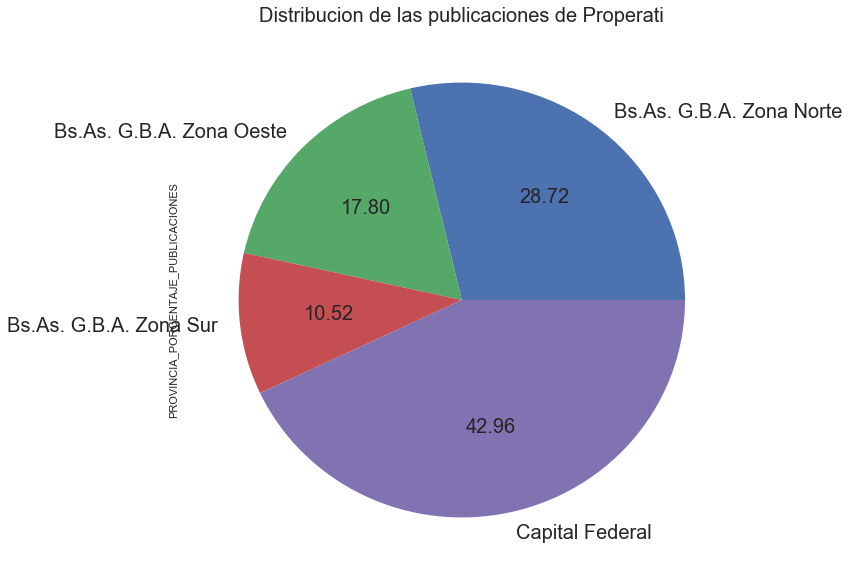

In [39]:

plt.figure()
plt.title('Distribucion de las publicaciones de Properati', fontsize=20)

#comparar porcentaje y totales
datos_count.set_index(['provincia'])['PROVINCIA_PORCENTAJE_PUBLICACIONES'].plot.pie(figsize=(10, 10),legend=False,fontsize=20,autopct='%.2f')

In [40]:
#Tenemos que remover todos aquellos datos que no tienen precio, puesto que no aportan al análisis. 
datos = datos.loc[datos['precio'].notnull(),:]
datos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 757278 entries, 4 to 187480
Data columns (total 19 columns):
fecha                     757278 non-null object
descripcion               302539 non-null object
piso                      126279 non-null float64
lugar                     757278 non-null object
precio                    757278 non-null float64
precio_por_m2             591217 non-null float64
tipo_propiedad            757278 non-null object
habitaciones              519561 non-null float64
superficie_m2             392988 non-null float64
superficie_cubierta_m2    266147 non-null float64
superficie_total_m2       216399 non-null float64
url                       757278 non-null object
expensas                  49829 non-null object
lat                       628769 non-null float64
lon                       628758 non-null float64
geonames_id               617303 non-null float64
pais                      757278 non-null object
provincia                 757278 non-null objec

In [41]:
#Eliminamos duplicados
datos = datos.drop_duplicates()
datos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 410823 entries, 4 to 187480
Data columns (total 19 columns):
fecha                     410823 non-null object
descripcion               208613 non-null object
piso                      64335 non-null float64
lugar                     410823 non-null object
precio                    410823 non-null float64
precio_por_m2             311617 non-null float64
tipo_propiedad            410823 non-null object
habitaciones              263898 non-null float64
superficie_m2             174308 non-null float64
superficie_cubierta_m2    184497 non-null float64
superficie_total_m2       149804 non-null float64
url                       410823 non-null object
expensas                  31017 non-null object
lat                       327896 non-null float64
lon                       327891 non-null float64
geonames_id               332025 non-null float64
pais                      410823 non-null object
provincia                 410823 non-null object

In [42]:
print(datos['tipo_propiedad'].unique())

['house' 'apartment' 'PH' 'store']


# Separación de datos en datasets

In [43]:
#Datos del GRAN BUENOS AIRES
datosBUE = datos[datos['provincia'].str.contains('G.B.A.') & (datos['localidad'] != "")]
print(datosBUE['provincia'].unique())

['Bs.As. G.B.A. Zona Norte' 'Bs.As. G.B.A. Zona Oeste'
 'Bs.As. G.B.A. Zona Sur']


# Datos Capital Federal

In [44]:
datosCapital = datos[(datos['provincia'] == 'Capital Federal') & (datos['localidad'] != "") & (datos['lat'].notnull()) & (datos['lon'].notnull())]
datosCapital.loc[:,'localidad'] = list(map(lambda x: x.upper(), datosCapital['localidad']))
datosCapital['localidad'].unique()

C:\Users\nicol\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


array(['PALERMO', 'FLORES', 'FLORESTA', 'PARQUE CENTENARIO', 'LINIERS',
       'CONSTITUCIÓN', 'ABASTO', 'ALMAGRO', 'RECOLETA', 'VILLA CRESPO',
       'VILLA PUEYRREDÓN', 'RETIRO', 'BELGRANO', 'MONTE CASTRO',
       'VELEZ SARSFIELD', 'SAN NICOLÁS', 'ONCE', 'COLEGIALES',
       'VILLA LURO', 'MATADEROS', 'COGHLAN', 'CABALLITO', 'BARRIO NORTE',
       'VILLA DEVOTO', 'NUÑEZ', 'VILLA URQUIZA', 'CONGRESO', 'SAAVEDRA',
       'AGRONOMÍA', 'VILLA DEL PARQUE', 'SAN TELMO',
       'CENTRO / MICROCENTRO', 'BALVANERA', 'BARRACAS', 'SAN CRISTOBAL',
       'MONSERRAT', 'BOEDO', 'PARQUE CHACABUCO', 'TRIBUNALES', 'CHACARITA',
       'PATERNAL', 'LAS CAÑITAS', 'PARQUE AVELLANEDA', 'PUERTO MADERO',
       'PARQUE PATRICIOS', 'VILLA SANTA RITA', 'VILLA REAL',
       'VILLA LUGANO', 'VILLA GENERAL MITRE', 'VERSALLES', 'VILLA ORTUZAR',
       'BOCA', 'PARQUE CHAS', 'VILLA SOLDATI', 'POMPEYA', 'CATALINAS',
       'VILLA RIACHUELO', 'DISTRITO DE LAS ARTES'], dtype=object)

## MAPA DE CAPITAL FEDERAL

### Debido a que es posible acceder a la información del Gobierno de la Ciudad (https://data.buenosaires.gob.ar/dataset/barrios) utilizamos el set de barrios de la ciudad para conocer la cantidad de publicaciones

Cantidad de publicaciones por Barrio

In [45]:
#ELIMINAMOS ACENTOS Y DEJAMOS LOS DATOS IGUALES QUE LOS DATOS DEL GOBIERNO DE LA CIUDAD
datosCapital.loc[:,'localidad'] = datosCapital['localidad'].replace('VILLA GENERAL MITRE', 'VILLA GRAL. MITRE')
datosCapital.loc[:,'localidad'] = datosCapital['localidad'].replace('POMPEYA', 'NUEVA POMPEYA')
datosCapital.loc[:,'localidad'] = datosCapital['localidad'].str.replace('\xc3\xa1', 'A')
datosCapital.loc[:,'localidad'] = datosCapital['localidad'].str.replace('\xc3\xb3', 'O')
datosCapital.loc[:,'localidad'] = datosCapital['localidad'].str.replace('\xc3\xad', 'I')
datosCapital.loc[:,'localidad'] = datosCapital['localidad'].str.replace('\xc3\xb1', '\xd1')

datosCapital['localidad'].unique()

C:\Users\nicol\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


array(['PALERMO', 'FLORES', 'FLORESTA', 'PARQUE CENTENARIO', 'LINIERS',
       'CONSTITUCIÓN', 'ABASTO', 'ALMAGRO', 'RECOLETA', 'VILLA CRESPO',
       'VILLA PUEYRREDÓN', 'RETIRO', 'BELGRANO', 'MONTE CASTRO',
       'VELEZ SARSFIELD', 'SAN NICOLÁS', 'ONCE', 'COLEGIALES',
       'VILLA LURO', 'MATADEROS', 'COGHLAN', 'CABALLITO', 'BARRIO NORTE',
       'VILLA DEVOTO', 'NUÑEZ', 'VILLA URQUIZA', 'CONGRESO', 'SAAVEDRA',
       'AGRONOMÍA', 'VILLA DEL PARQUE', 'SAN TELMO',
       'CENTRO / MICROCENTRO', 'BALVANERA', 'BARRACAS', 'SAN CRISTOBAL',
       'MONSERRAT', 'BOEDO', 'PARQUE CHACABUCO', 'TRIBUNALES', 'CHACARITA',
       'PATERNAL', 'LAS CAÑITAS', 'PARQUE AVELLANEDA', 'PUERTO MADERO',
       'PARQUE PATRICIOS', 'VILLA SANTA RITA', 'VILLA REAL',
       'VILLA LUGANO', 'VILLA GRAL. MITRE', 'VERSALLES', 'VILLA ORTUZAR',
       'BOCA', 'PARQUE CHAS', 'VILLA SOLDATI', 'NUEVA POMPEYA',
       'CATALINAS', 'VILLA RIACHUELO', 'DISTRITO DE LAS ARTES'], dtype=object)

# 

In [46]:
datosCapitalLocalidad_count = pd.DataFrame({'CANTIDAD_PUBLICACIONES' : datosCapital.groupby(['localidad'])['url'].count(), 'LAT_MEAN' : datosCapital.groupby(['localidad'])['lat'].mean(), 'LON_MEAN' :datosCapital.groupby(['localidad'])['lon'].mean()}).reset_index()
#datosCapitalLocalidad_count['pos']= datosCapitalLocalidad_count.apply(lambda x:'%s,%s' % (datosCapitalLocalidad_count['LAT_MEAN'],datosCapitalLocalidad_count['LON_MEAN']),axis=1)
#datosCapitalLocalidad_count['pos_1'] = datosCapitalLocalidad_count[['LAT_MEAN','LON_MEAN']].values.tolist()
datosCapitalLocalidad_count['pos'] = list(zip(datosCapitalLocalidad_count['LAT_MEAN'],datosCapitalLocalidad_count['LON_MEAN']))
#df['new_col'] = list(zip(df.lat, df.long))
datosCapitalLocalidad_count.sort_values(by='CANTIDAD_PUBLICACIONES', ascending=False)
datosCapitalLocalidad_count

,localidad,CANTIDAD_PUBLICACIONES,LAT_MEAN,LON_MEAN,pos
0,ABASTO,635,-34.291613,-58.215570,"(-34.2916130159, -58.2155696782)"
1,AGRONOMÍA,201,-34.592698,-58.485714,"(-34.5926983704, -58.4857141371)"
2,ALMAGRO,5159,-34.606237,-58.422057,"(-34.6062370453, -58.422056556)"
3,BALVANERA,3172,-34.596126,-58.418519,"(-34.5961258773, -58.4185192291)"
4,BARRACAS,3351,-34.586996,-58.409574,"(-34.5869959767, -58.4095742754)"
5,BARRIO NORTE,6621,-33.712661,-59.021272,"(-33.7126607609, -59.0212719106)"
6,BELGRANO,13592,-34.459548,-58.427500,"(-34.4595480084, -58.4274996004)"
7,BOCA,882,-34.632994,-58.365184,"(-34.6329940097, -58.3651841699)"
8,BOEDO,3923,-34.630666,-58.424961,"(-34.6306658157, -58.4249610802)"
9,CABALLITO,9093,-34.598833,-58.449343,"(-34.5988326219, -58.4493433635)"


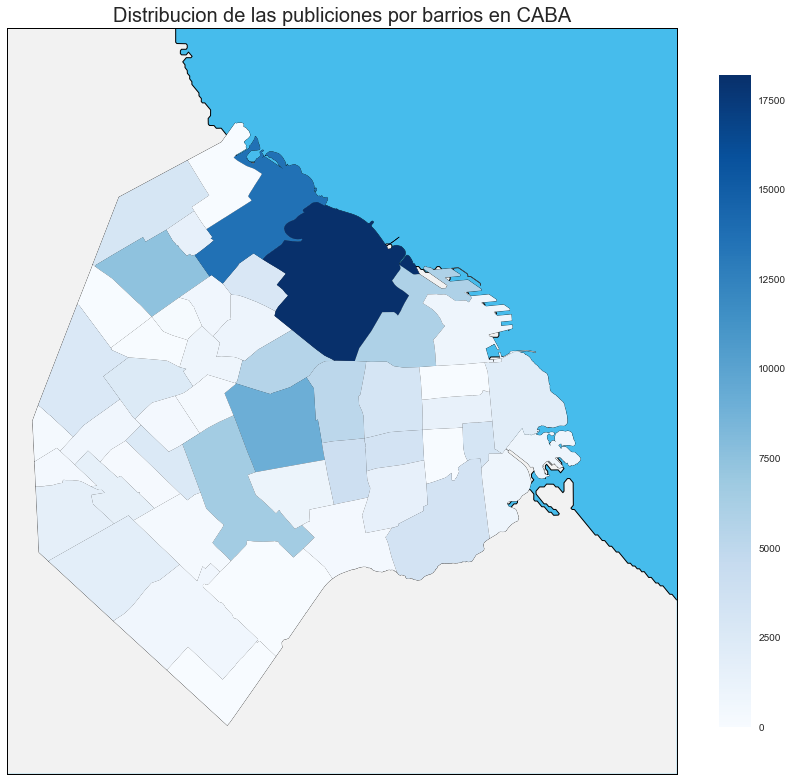

In [47]:
fig, ax = plt.subplots(figsize=(15,20))
m = Basemap(resolution='f', # c, l, i, h, f or None
            projection='merc',
            lat_0=-54.61, lon_0=-58.43,
            llcrnrlon=-58.54, llcrnrlat=-34.72, urcrnrlon=-58.3, urcrnrlat=-34.5)
             
m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
m.drawcoastlines()
m.readshapefile('resources/barrios_badata_WGS84', 'areas')

df_polygonoCaba = pd.DataFrame({
        'shapes': [Polygon(np.array(shape), True) for shape in m.areas],
        'localidad': [area['BARRIO'] for area in m.areas_info]
    })

df_polygonoCaba = df_polygonoCaba.merge(datosCapitalLocalidad_count, on='localidad', how='left')

cmap = plt.get_cmap('Blues')   
pc = PatchCollection(df_polygonoCaba.shapes, zorder=2)
norm = Normalize()

pc.set_facecolor(cmap(norm(df_polygonoCaba['CANTIDAD_PUBLICACIONES'].fillna(0).values)))
ax.add_collection(pc)

mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)

mapper.set_array(df_polygonoCaba['CANTIDAD_PUBLICACIONES'])

#for label, xpt, ypt in zip(df_polygonoCaba.localidad, df_polygonoCaba.LAT_MEAN, df_polygonoCaba.LON_MEAN):
#    plt.text(xpt+10000, ypt+5000, label)
datosCapitalLocalidad_count.loc[:,'localidad'] = datosCapitalLocalidad_count['localidad'].str.replace('\xd1', 'N')

#for label, xpt, ypt in zip(datosCapitalLocalidad_count.localidad, datosCapitalLocalidad_count.LAT_MEAN, datosCapitalLocalidad_count.LON_MEAN):
#    plt.text(xpt, ypt, label)


plt.title('Distribucion de las publiciones por barrios en CABA', fontsize=20)

plt.colorbar(mapper, shrink=0.6)



## FIN MAPA CABA

In [121]:
datosCapitalLocalidad_mediaprecios = pd.DataFrame({'PRECIO_MEDIO' : datosCapital.groupby(['localidad'])['precio'].mean(), 'LAT_MEAN' : datosCapital.groupby(['localidad'])['lat'].mean(), 'LON_MEAN' :datosCapital.groupby(['localidad'])['lon'].mean()}).reset_index()
#datosCapitalLocalidad_count['pos']= datosCapitalLocalidad_count.apply(lambda x:'%s,%s' % (datosCapitalLocalidad_count['LAT_MEAN'],datosCapitalLocalidad_count['LON_MEAN']),axis=1)
#datosCapitalLocalidad_count['pos_1'] = datosCapitalLocalidad_count[['LAT_MEAN','LON_MEAN']].values.tolist()
datosCapitalLocalidad_mediaprecios['pos'] = list(zip(datosCapitalLocalidad_mediaprecios['LAT_MEAN'],datosCapitalLocalidad_mediaprecios['LON_MEAN']))


datosCapitalLocalidad_mediaprecios.sort_values(by='PRECIO_MEDIO', ascending=False).head(10)


,localidad,LAT_MEAN,LON_MEAN,PRECIO_MEDIO,pos
35,PUERTO MADERO,-34.612191,-58.363705,798387.779086,"(-34.6121908671, -58.3637047275)"
10,CATALINAS,-34.596561,-58.379698,514450.000000,"(-34.5965605042, -58.3796978245)"
36,RECOLETA,-34.587694,-58.378089,394965.699106,"(-34.5876937715, -58.3780893656)"
37,RETIRO,-34.594930,-58.379122,363259.885904,"(-34.5949298284, -58.3791216153)"
28,PALERMO,-34.538426,-58.428358,298565.410939,"(-34.5384261537, -58.4283575994)"
6,BELGRANO,-34.459548,-58.427500,288070.020935,"(-34.4595480084, -58.4274996004)"
5,BARRIO NORTE,-33.712661,-59.021272,284504.481270,"(-33.7126607609, -59.0212719106)"
56,VILLA SOLDATI,-34.663430,-58.446684,282370.703256,"(-34.6634300184, -58.4466842083)"
20,LAS CAÑITAS,-33.117476,-59.389209,281901.379362,"(-33.1174756351, -59.3892094991)"
43,VELEZ SARSFIELD,-34.632110,-58.492782,241883.712819,"(-34.6321099569, -58.4927821669)"


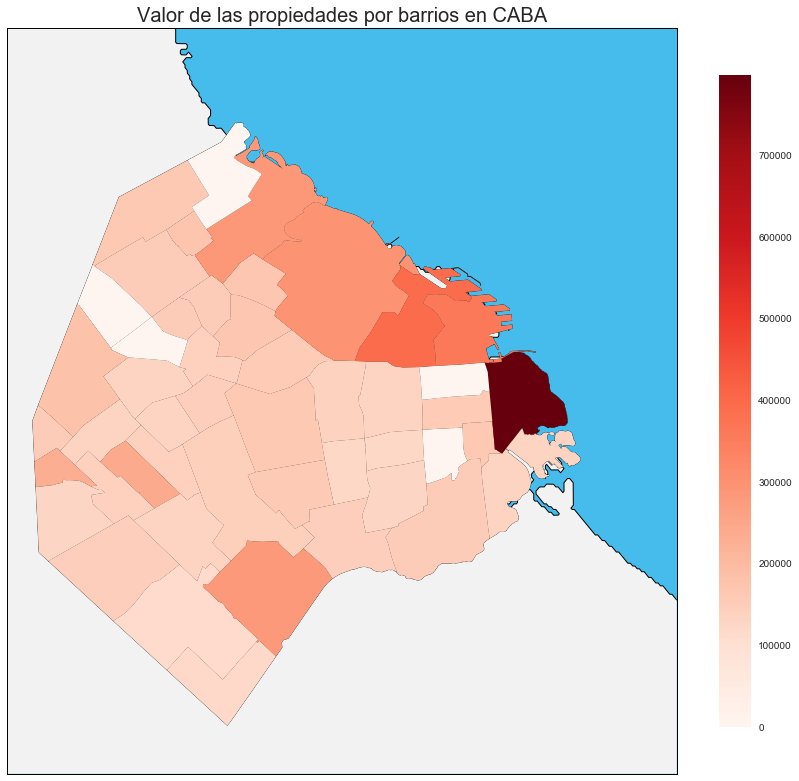

In [120]:
fig, ax = plt.subplots(figsize=(15,20))
m = Basemap(resolution='f', # c, l, i, h, f or None
            projection='merc',
            lat_0=-54.61, lon_0=-58.43,
            llcrnrlon=-58.54, llcrnrlat=-34.72, urcrnrlon=-58.3, urcrnrlat=-34.5)
             
m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
m.drawcoastlines()
m.readshapefile('resources/barrios_badata_WGS84', 'areas')

df_polygonoCaba = pd.DataFrame({
        'shapes': [Polygon(np.array(shape), True) for shape in m.areas],
        'localidad': [area['BARRIO'] for area in m.areas_info]
    })

df_polygonoCaba = df_polygonoCaba.merge(datosCapitalLocalidad_mediaprecios, on='localidad', how='left')

cmap = plt.get_cmap('Reds')   
pc = PatchCollection(df_polygonoCaba.shapes, zorder=2)
norm = Normalize()

pc.set_facecolor(cmap(norm(df_polygonoCaba['PRECIO_MEDIO'].fillna(0).values)))
ax.add_collection(pc)

mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)

mapper.set_array(df_polygonoCaba['PRECIO_MEDIO'])

#for label, xpt, ypt in zip(df_polygonoCaba.localidad, df_polygonoCaba.LAT_MEAN, df_polygonoCaba.LON_MEAN):
#    plt.text(xpt+10000, ypt+5000, label)
datosCapitalLocalidad_mediaprecios.loc[:,'localidad'] = datosCapitalLocalidad_mediaprecios['localidad'].str.replace('\xd1', 'N')

#for label, xpt, ypt in zip(datosCapitalLocalidad_count.localidad, datosCapitalLocalidad_count.LAT_MEAN, datosCapitalLocalidad_count.LON_MEAN):
#    plt.text(xpt, ypt, label)


plt.title('Valor de las propiedades por barrios en CABA', fontsize=20)

plt.colorbar(mapper, shrink=0.6)

# Tipos de propiedades

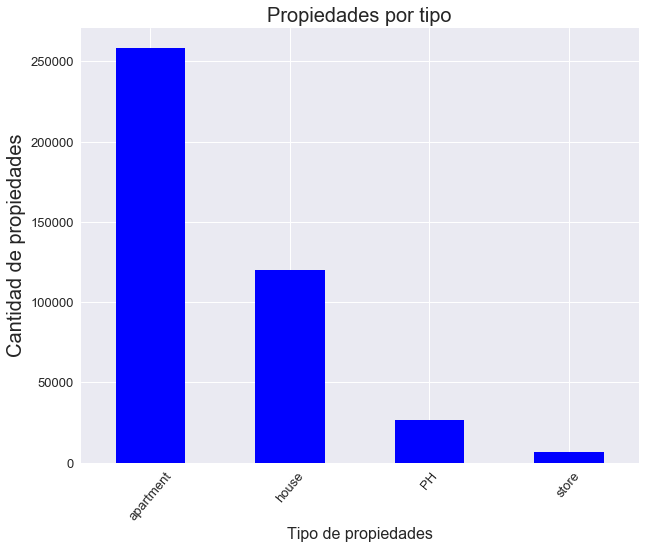

In [51]:
#Analizamos las propiedades por tipo
datos['tipo_propiedad'].value_counts().plot(kind='bar', rot=50, figsize=(10,8), color='blue' ,fontsize=13);
plt.title('Propiedades por tipo', fontsize=20);
plt.xlabel('Tipo de propiedades', fontsize=16);
plt.ylabel('Cantidad de propiedades', fontsize=20);

# Tipos de propiedades en Capital Federal

In [52]:
#Declaramos variable que usaremos durante esa sección
datosCapSinVacios = datosCapital.loc[datosCapital.localidad != '', :]
#datosCapSinVacios = datosCapital[datosCapital.localidad != ""]


In [53]:
#datosCapSinVacios['total'] = 1 
datosCapSinVacios.loc[:,'total']=1 #evita mensaje  SettingWithCopyWarning:
tiposPropiedadCapital = datosCapSinVacios.groupby(['tipo_propiedad']).sum()
tiposPropiedadCapital = tiposPropiedadCapital[['total']].reset_index()
tiposPropiedadCapital.sort_values('total', ascending=False).head(5)

,tipo_propiedad,total
1,apartment,125661
0,PH,9695
2,house,7623
3,store,2631


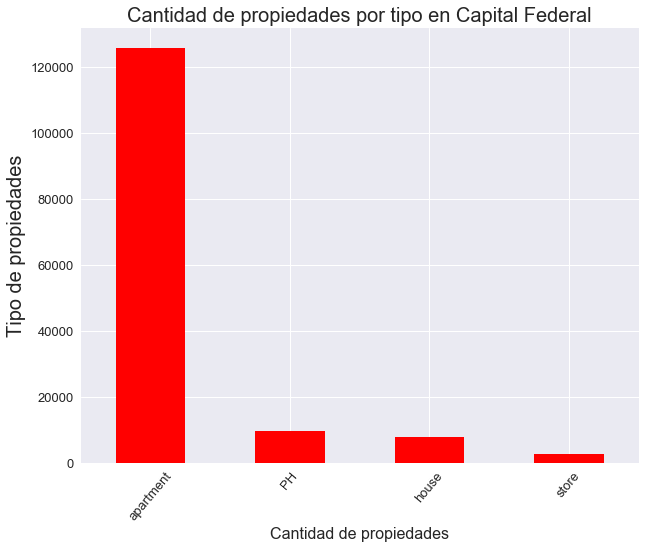

In [54]:
tiposPropiedadCapital2 = datosCapSinVacios['tipo_propiedad'].value_counts().sort_values(ascending=False)
tiposPropiedadCapital2 = tiposPropiedadCapital2.head(5)

tiposPropiedadCapital2.plot(kind='bar', rot=50, figsize=(10,8), color='red' ,fontsize=13);

plt.title('Cantidad de propiedades por tipo en Capital Federal', fontsize=20);
plt.xlabel('Cantidad de propiedades', fontsize=16);
plt.ylabel('Tipo de propiedades', fontsize=20);

In [55]:
#Cantidad de ventas por zona
totalDatosCapitalByPlaces = datosCapSinVacios.groupby(['localidad', 'tipo_propiedad']).sum()
totalDatosCapitalByPlaces = totalDatosCapitalByPlaces[['total']].reset_index()
#totalDatosCapitalByPlaces = totalDatosCapitalByPlaces.sort_values('total', ascending=False)
totalApartamentos =  totalDatosCapitalByPlaces[totalDatosCapitalByPlaces['tipo_propiedad'] == 'apartment']
totalApartamentos.sort_values('total', ascending=False).head(10)


,localidad,tipo_propiedad,total
108,PALERMO,apartment,16859
25,BELGRANO,apartment,12725
37,CABALLITO,apartment,8299
222,VILLA URQUIZA,apartment,6479
21,BARRIO NORTE,apartment,6359
140,RECOLETA,apartment,5749
68,FLORES,apartment,5516
100,NUÑEZ,apartment,5009
175,VILLA CRESPO,apartment,4812
9,ALMAGRO,apartment,4632


In [56]:
totalCasas = totalDatosCapitalByPlaces[totalDatosCapitalByPlaces['tipo_propiedad'] == 'house']
totalCasas.sort_values('total', ascending=False).head(10)

,localidad,tipo_propiedad,total
26,BELGRANO,house,521
109,PALERMO,house,463
184,VILLA DEVOTO,house,462
69,FLORES,house,460
85,MATADEROS,house,447
223,VILLA URQUIZA,house,377
73,FLORESTA,house,369
149,SAAVEDRA,house,325
38,CABALLITO,house,281
180,VILLA DEL PARQUE,house,279


In [57]:
totalPH = totalDatosCapitalByPlaces[totalDatosCapitalByPlaces['tipo_propiedad'] == 'PH']
totalPH.sort_values('total', ascending=False).head(10)

,localidad,tipo_propiedad,total
221,VILLA URQUIZA,PH,563
107,PALERMO,PH,560
83,MATADEROS,PH,496
67,FLORES,PH,486
71,FLORESTA,PH,485
182,VILLA DEVOTO,PH,469
36,CABALLITO,PH,448
178,VILLA DEL PARQUE,PH,370
202,VILLA PUEYRREDÓN,PH,354
174,VILLA CRESPO,PH,343


In [58]:
totalStore = totalDatosCapitalByPlaces[totalDatosCapitalByPlaces['tipo_propiedad'] == 'store']
totalStore.sort_values('total', ascending=False).head(10)

,localidad,tipo_propiedad,total
110,PALERMO,store,325
177,VILLA CRESPO,store,212
27,BELGRANO,store,140
45,CENTRO / MICROCENTRO,store,136
142,RECOLETA,store,118
23,BARRIO NORTE,store,112
15,BALVANERA,store,107
70,FLORES,store,104
162,SAN TELMO,store,91
106,ONCE,store,87


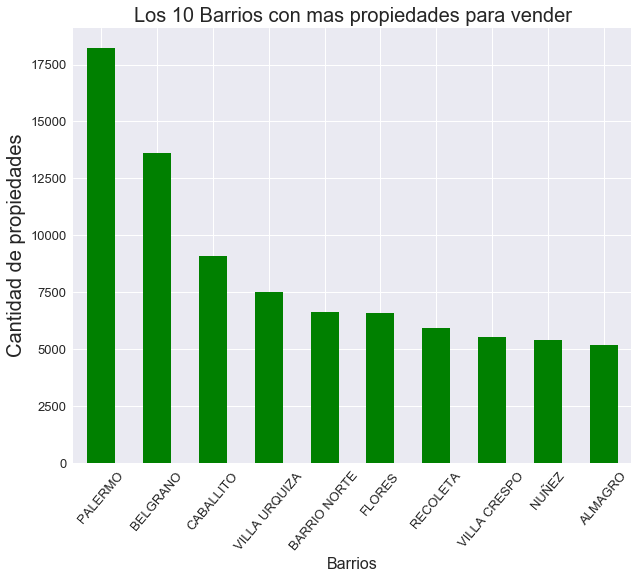

In [59]:
totalPropiedades2_top10 = datosCapSinVacios['localidad'].value_counts().sort_values(ascending=False)
totalPropiedades2_top10 = totalPropiedades2_top10.head(10)

totalPropiedades2_top10.plot(kind='bar', rot=50, figsize=(10,8), color='green' ,fontsize=13);

plt.title('Los 10 Barrios con mas propiedades para vender', fontsize=20);
plt.xlabel('Barrios', fontsize=16);
plt.ylabel('Cantidad de propiedades', fontsize=20);

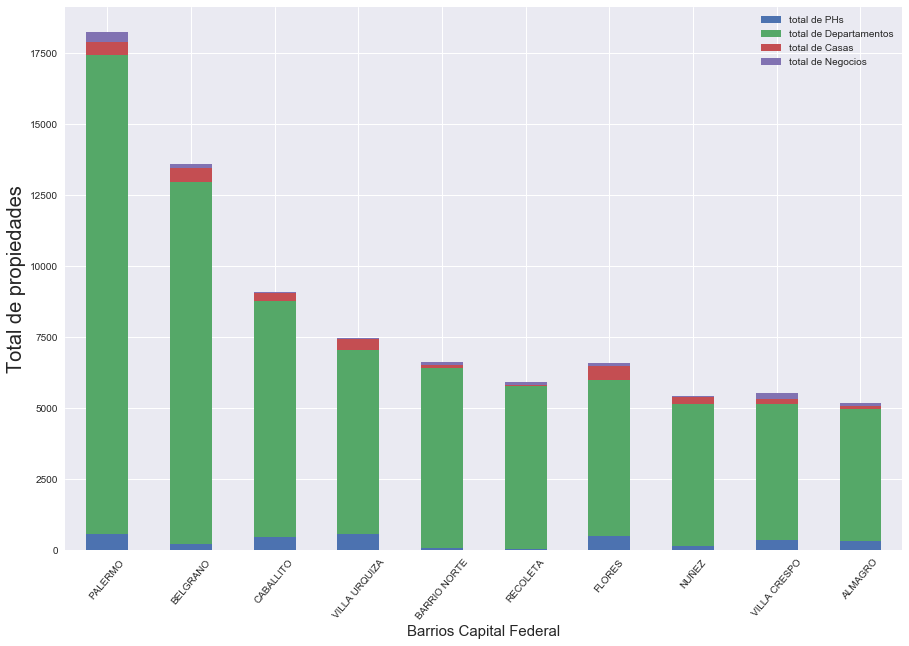

In [60]:
propiedades_ph  = datosCapSinVacios[['localidad','tipo_propiedad']][datosCapSinVacios['tipo_propiedad']=='PH'].groupby('localidad').count()
propiedades_departamento  = datosCapSinVacios[['localidad','tipo_propiedad']][datosCapSinVacios['tipo_propiedad']=='apartment'].groupby('localidad').count()
propiedades_casa  = datosCapSinVacios[['localidad','tipo_propiedad']][datosCapSinVacios['tipo_propiedad']=='house'].groupby('localidad').count()
propiedades_negocio  = datosCapSinVacios[['localidad','tipo_propiedad']][datosCapSinVacios['tipo_propiedad']=='store'].groupby('localidad').count()

propiedades_ph.rename(columns={'tipo_propiedad': 'total de PHs'}, inplace=True)
propiedades_departamento.rename(columns={'tipo_propiedad': 'total de Departamentos'}, inplace=True)
propiedades_casa.rename(columns={'tipo_propiedad': 'total de Casas'}, inplace=True)
propiedades_negocio.rename(columns={'tipo_propiedad': 'total de Negocios'}, inplace=True)

merge_tipo_prop_x_barrio = pd.merge(pd.merge(pd.merge(propiedades_ph, propiedades_departamento,right_index=True, left_index=True),propiedades_casa,right_index=True, left_index=True), propiedades_negocio,right_index=True, left_index=True)
merge_tipo_prop_x_barrio_top10 = merge_tipo_prop_x_barrio.sort_values('total de Departamentos',ascending=False).head(10)

merge_tipo_prop_x_barrio_top10.plot(kind="bar", stacked=True , rot=50, figsize=(15,10))
#merge_tipo_prop_x_barrio_top10.plot(kind="area", stacked=True , rot=50, figsize=(15,10))

plt.xlabel('Barrios Capital Federal', fontsize=15);
plt.ylabel('Total de propiedades', fontsize=20);

# Precios por M2 - Top 10 por tipo de propiedad

In [61]:
#Precios En Capital Federal
datosCapSinVacios.sort_values('precio_por_m2', ascending=False).head(5)

,fecha,descripcion,piso,lugar,precio,precio_por_m2,tipo_propiedad,habitaciones,superficie_m2,superficie_cubierta_m2,superficie_total_m2,url,expensas,lat,lon,geonames_id,pais,provincia,localidad,total
36348,2014-02-21,NaN,1.0,|Argentina|Capital Federal|Nuñez|,10948272.81,260673.162143,apartment,2.0,42.0,NaN,NaN,http://www.properati.com.ar/d9cg_venta_departa...,NaN,-34.547497,-58.469513,3430348.0,Argentina,Capital Federal,NUÑEZ,1
41687,2017-04-28,Departamento 1 ambiente divisible Depto en CU...,NaN,|Argentina|Capital Federal|Boedo|,6809000.00,206333.333333,apartment,1.0,NaN,33.0,33.0,http://www.properati.com.ar/17rbf_venta_depart...,NaN,-34.622204,-58.416089,3436003.0,Argentina,Capital Federal,BOEDO,1
55532,2013-09-18,NaN,NaN,|Argentina|Capital Federal|Recoleta|,30000000.00,142857.142857,apartment,4.0,210.0,NaN,NaN,http://www.properati.com.ar/9va3_venta_departa...,NaN,-34.590939,-58.388895,3429595.0,Argentina,Capital Federal,RECOLETA,1
30699,2015-06-26,CODIGO: 617-REALTY301 ubicado en: Cerviño 4600...,NaN,|Argentina|Capital Federal|Palermo|,6800000.00,56666.666667,apartment,NaN,NaN,119.0,120.0,http://www.properati.com.ar/rkiw_venta_departa...,NaN,-34.575522,-58.422299,3430234.0,Argentina,Capital Federal,PALERMO,1
17038,2016-06-28,Excelente Semipiso en lo mejor de Belgrano Chi...,NaN,|Argentina|Capital Federal|Belgrano|,549900.00,54990.000000,apartment,4.0,NaN,130.0,10.0,http://www.properati.com.ar/zlvr_venta_departa...,7200,-34.559918,-58.445111,3436077.0,Argentina,Capital Federal,BELGRANO,1


In [62]:
datosCapitalByM2 = datosCapSinVacios.groupby(['localidad','tipo_propiedad']).mean()
datosCapitalByM2 = datosCapitalByM2[['precio_por_m2', 'habitaciones']].reset_index()
datosCapitalByM2.sort_values('precio_por_m2', ascending=False).head(10)

,localidad,tipo_propiedad,precio_por_m2,habitaciones
136,PUERTO MADERO,apartment,5375.611656,2.904385
138,PUERTO MADERO,store,4786.104318,1.000000
142,RECOLETA,store,4726.996331,1.000000
23,BARRIO NORTE,store,4220.002277,3.900000
110,PALERMO,store,4209.318466,1.774194
106,ONCE,store,3972.416211,2.571429
137,PUERTO MADERO,house,3874.755256,5.750000
177,VILLA CRESPO,store,3794.685529,1.421053
78,LAS CAÑITAS,store,3766.513057,NaN
141,RECOLETA,house,3395.752060,2.857143


### Precios por M2 - Top 10 precio por m2 de Departamentos por Barrio

In [63]:
promedioM2Apartment = datosCapitalByM2[datosCapitalByM2['tipo_propiedad'] == 'apartment']
promedioM2Apartment_top10 = promedioM2Apartment.sort_values('precio_por_m2', ascending=False).head(10)
promedioM2Apartment_top10

,localidad,tipo_propiedad,precio_por_m2,habitaciones
136,PUERTO MADERO,apartment,5375.611656,2.904385
76,LAS CAÑITAS,apartment,3388.715690,2.506505
100,NUÑEZ,apartment,3150.089688,2.308895
108,PALERMO,apartment,3129.509598,2.551178
140,RECOLETA,apartment,3105.066079,3.482574
51,COGHLAN,apartment,2863.872586,2.010578
25,BELGRANO,apartment,2826.200317,2.669373
21,BARRIO NORTE,apartment,2744.873220,3.049700
144,RETIRO,apartment,2660.546588,3.353823
33,BOEDO,apartment,2650.608148,1.454949


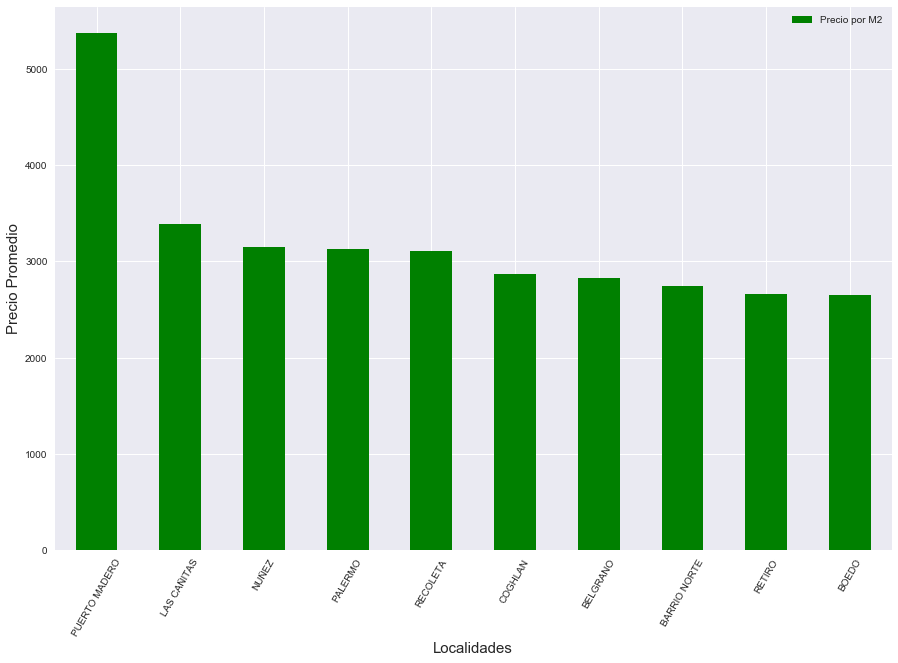

In [64]:
graficoDepartamento = promedioM2Apartment_top10[['localidad','precio_por_m2']].set_index('localidad')
graficoDepartamento.rename(columns={'precio_por_m2':'Precio por M2'},inplace=True)

graficoDepartamento.plot(kind="bar", stacked=True , rot=60, figsize=(15,10), color='green')

plt.xlabel('Localidades', fontsize=15);
plt.ylabel('Precio Promedio', fontsize=15);

### Precios por M2 - Top 10 valor del m2 de casas por barrio

In [65]:
promedioM2House = datosCapitalByM2[datosCapitalByM2['tipo_propiedad'] == 'house']
promedioM2House_top10 = promedioM2House.sort_values('precio_por_m2', ascending=False).head(10)
promedioM2House_top10

,localidad,tipo_propiedad,precio_por_m2,habitaciones
137,PUERTO MADERO,house,3874.755256,5.750000
141,RECOLETA,house,3395.752060,2.857143
109,PALERMO,house,2992.415600,4.590164
77,LAS CAÑITAS,house,2304.359338,3.000000
26,BELGRANO,house,2253.104907,4.984043
34,BOEDO,house,2127.115895,4.581818
101,NUÑEZ,house,1879.988703,4.890411
145,RETIRO,house,1838.613702,7.000000
2,ABASTO,house,1830.128205,2.000000
56,COLEGIALES,house,1816.559161,4.842857


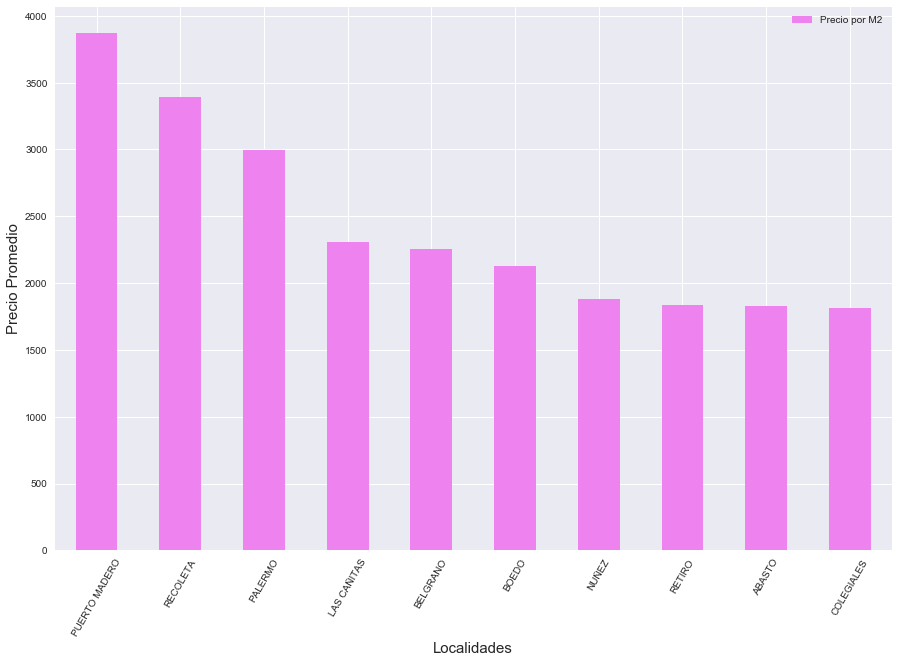

In [66]:
graficoHouse= promedioM2House_top10[['localidad','precio_por_m2']].set_index('localidad')
graficoHouse.rename(columns={'precio_por_m2':'Precio por M2'},inplace=True)
graficoHouse.plot(kind="bar", stacked=True , rot=60, figsize=(15,10), color='violet')

plt.xlabel('Localidades', fontsize=15);
plt.ylabel('Precio Promedio', fontsize=15);

### Precios por M2 - Top 10 valor del m2 de PH por barrio

In [67]:
promedioM2PH = datosCapitalByM2[datosCapitalByM2['tipo_propiedad'] == 'PH']
promedioM2PH_top10 = promedioM2PH.sort_values('precio_por_m2', ascending=False).head(10)
promedioM2PH_top10

,localidad,tipo_propiedad,precio_por_m2,habitaciones
143,RETIRO,PH,3283.582090,2.000000
75,LAS CAÑITAS,PH,2515.695187,2.200000
107,PALERMO,PH,2203.493767,3.408257
139,RECOLETA,PH,2196.776503,3.826087
24,BELGRANO,PH,2091.139017,3.568047
50,COGHLAN,PH,2086.448840,3.072464
20,BARRIO NORTE,PH,2084.170923,3.576923
99,NUÑEZ,PH,1942.382689,3.541284
91,MONTE CASTRO,PH,1824.540054,2.611511
147,SAAVEDRA,PH,1821.702992,2.920949


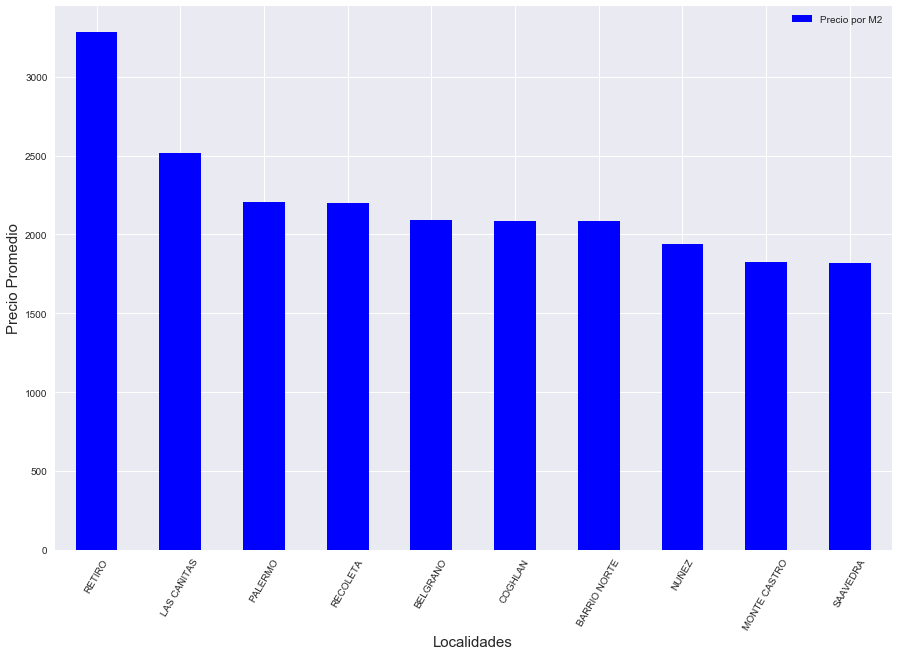

In [68]:
graficoPH = promedioM2PH_top10[['localidad','precio_por_m2']].set_index('localidad')
graficoPH.rename(columns={'precio_por_m2':'Precio por M2'},inplace=True)
graficoPH.plot(kind="bar", stacked=True , rot=60, figsize=(15,10), color='blue')

plt.xlabel('Localidades', fontsize=15);
plt.ylabel('Precio Promedio', fontsize=15);

### Precios por M2 - Top 10 valor del m2 de locales comerciales por barrio


In [69]:
promedioM2Store = datosCapitalByM2[datosCapitalByM2['tipo_propiedad'] == 'store']
promedioM2Store_top10 = promedioM2Store.sort_values('precio_por_m2', ascending=False).head(10)
promedioM2Store_top10

,localidad,tipo_propiedad,precio_por_m2,habitaciones
138,PUERTO MADERO,store,4786.104318,1.000000
142,RECOLETA,store,4726.996331,1.000000
23,BARRIO NORTE,store,4220.002277,3.900000
110,PALERMO,store,4209.318466,1.774194
106,ONCE,store,3972.416211,2.571429
177,VILLA CRESPO,store,3794.685529,1.421053
78,LAS CAÑITAS,store,3766.513057,NaN
27,BELGRANO,store,3308.014184,1.466667
102,NUÑEZ,store,3231.601108,2.000000
158,SAN NICOLÁS,store,3088.953716,1.894737


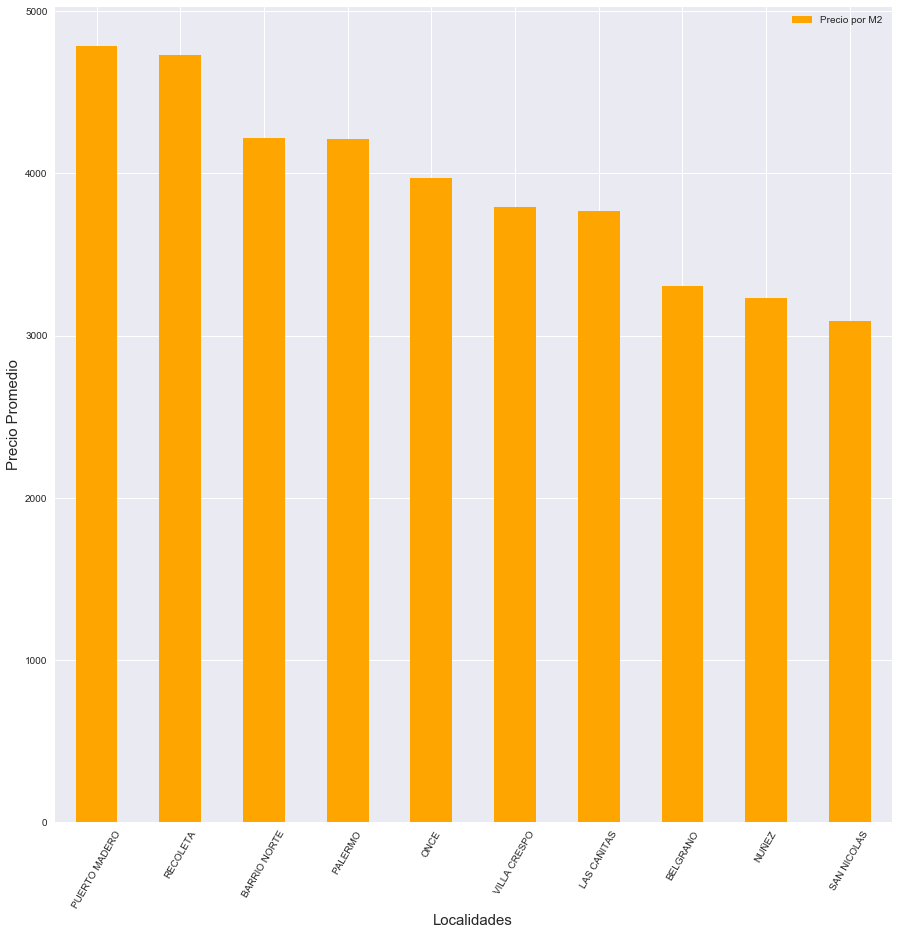

In [124]:
graficoStore = promedioM2Store_top10[['localidad','precio_por_m2']].set_index('localidad')
graficoStore.rename(columns={'precio_por_m2':'Precio por M2'},inplace=True)
graficoStore.plot(kind="bar", stacked=True , rot=60, figsize=(15,15), color='orange')

plt.xlabel('Localidades', fontsize=15);
plt.ylabel('Precio Promedio', fontsize=15);

# Precio en relación a superficie cubierta

In [71]:
datosCapitalBySurface = datosCapital.sort_values('superficie_cubierta_m2', ascending=False)
datosCapitalBySurface.head(10)

,fecha,descripcion,piso,lugar,precio,precio_por_m2,tipo_propiedad,habitaciones,superficie_m2,superficie_cubierta_m2,superficie_total_m2,url,expensas,lat,lon,geonames_id,pais,provincia,localidad
142119,2017-07-19,Barrio Norte EXCELENTE Semipiso al Frente Balc...,NaN,|Argentina|Capital Federal|Barrio Norte|,600000.0,NaN,apartment,NaN,NaN,187000.0,NaN,http://www.properati.com.ar/1ar12_venta_depart...,11000,-34.594573,-58.409166,3436109.0,Argentina,Capital Federal,BARRIO NORTE
24518,2016-05-02,CODIGO: 456-JDPVBE1 ubicado en: BLANCO ENCALAD...,NaN,|Argentina|Capital Federal|Villa Urquiza|,138000.0,2.224587,apartment,NaN,NaN,62034.0,62034.0,http://www.properati.com.ar/y5dl_venta_departa...,NaN,-34.573591,-58.483107,3433775.0,Argentina,Capital Federal,VILLA URQUIZA
3835,2014-03-25,CODIGO: 464-02 ubicado en: Av. San Juan al 270...,NaN,|Argentina|Capital Federal|San Cristobal|,319000.0,1070.469799,store,NaN,NaN,22518.0,298.0,http://www.properati.com.ar/eikd_venta_local_s...,NaN,-34.623620,-58.402698,3429153.0,Argentina,Capital Federal,SAN CRISTOBAL
135222,2017-07-19,C.A.B.A - Villa Soldati - CÓDIGO 0146Excelente...,NaN,|Argentina|Capital Federal|Villa Soldati|,8500000.0,775.688994,store,NaN,NaN,10958.0,10958.0,http://www.properati.com.ar/1ahu2_venta_local_...,1,-34.660122,-58.430251,3427366.0,Argentina,Capital Federal,VILLA SOLDATI
34540,2016-06-10,Venta de Negocio 5 AMBIENTES en BoedoVENTA DE ...,NaN,|Argentina|Capital Federal|Boedo|,1600000.0,160.000000,store,5.0,NaN,10000.0,10000.0,http://www.properati.com.ar/yyr9_venta_local_b...,NaN,-34.625145,-58.418894,3436003.0,Argentina,Capital Federal,BOEDO
122591,2017-07-04,Corredor Responsable: Uno Bienes Raices SRL - ...,3.0,|Argentina|Capital Federal|Monte Castro|,138000.0,NaN,apartment,4.0,NaN,9152.0,NaN,http://www.properati.com.ar/19r6g_venta_depart...,NaN,-34.618411,-58.497949,3430596.0,Argentina,Capital Federal,MONTE CASTRO
122898,2017-07-05,Corredor Responsable: Jorge Salafia - CUCICBA ...,NaN,|Argentina|Capital Federal|Liniers|,165000.0,NaN,house,4.0,NaN,8175.0,NaN,http://www.properati.com.ar/19rpq_venta_casa_l...,NaN,-34.642482,-58.528451,3431333.0,Argentina,Capital Federal,LINIERS
132152,2017-07-19,C.A.B.A - Boca - PRECIO A CONSULTAR - CÓDIGO 0...,NaN,|Argentina|Capital Federal|Boca|,8000000.0,1036.001036,store,NaN,NaN,7722.0,7722.0,http://www.properati.com.ar/1ad9w_venta_local_...,1,-34.644349,-58.365425,3436004.0,Argentina,Capital Federal,BOCA
54544,2017-05-21,Corredor Responsable: Martin Macagno - CUCICBA...,2.0,|Argentina|Capital Federal|Villa Crespo|,140000.0,NaN,apartment,3.0,NaN,7630.0,NaN,http://www.properati.com.ar/18gnz_venta_depart...,NaN,-34.594750,-58.442315,3427458.0,Argentina,Capital Federal,VILLA CRESPO
5217,2014-06-09,CODIGO: 129-007 ubicado en: Lebreton 4965 - P...,NaN,|Argentina|Capital Federal|Villa Urquiza|,117000.0,13.936867,apartment,NaN,NaN,7415.0,8395.0,http://www.properati.com.ar/g6ot_venta_departa...,NaN,-34.569717,-58.488119,3433775.0,Argentina,Capital Federal,VILLA URQUIZA


In [72]:
#Supongo que si hay superficie cubierta es menor a la total, hay balcones. Y quiero ver esa diferencia
datosCapitalBalcon = datosCapital[datosCapital['superficie_total_m2'] > datosCapital['superficie_cubierta_m2']]
datosCapitalBalcon.sort_values('precio', ascending=False).head()

,fecha,descripcion,piso,lugar,precio,precio_por_m2,tipo_propiedad,habitaciones,superficie_m2,superficie_cubierta_m2,superficie_total_m2,url,expensas,lat,lon,geonames_id,pais,provincia,localidad
43285,2015-06-18,VENTA DEPARTAMENTO PISO DE 2 UNIDADES ANEXADAS...,NaN,|Argentina|Capital Federal|Palermo|,8000000.0,10000.000000,apartment,6.0,NaN,0.0,800.0,http://www.properati.com.ar/rgf4_venta_departa...,NaN,-34.574750,-58.421124,3430234.0,Argentina,Capital Federal,PALERMO
33360,2015-07-23,PISO COMPLETO EN LE PARC!! - Impresionante pis...,NaN,|Argentina|Capital Federal|Palermo|,8000000.0,10256.410256,apartment,NaN,NaN,0.0,780.0,http://www.properati.com.ar/s2e1_venta_departa...,NaN,-34.575080,-58.420518,3430234.0,Argentina,Capital Federal,PALERMO
54799,2016-12-01,Unidad para reciclar. Titulos perfectos. (no e...,NaN,|Argentina|Capital Federal|Palermo|,7500000.0,9375.000000,apartment,4.0,NaN,750.0,800.0,http://www.properati.com.ar/13uyh_venta_depart...,NaN,-34.575215,-58.421028,3430234.0,Argentina,Capital Federal,PALERMO
30699,2015-06-26,CODIGO: 617-REALTY301 ubicado en: Cerviño 4600...,NaN,|Argentina|Capital Federal|Palermo|,6800000.0,56666.666667,apartment,NaN,NaN,119.0,120.0,http://www.properati.com.ar/rkiw_venta_departa...,NaN,-34.575522,-58.422299,3430234.0,Argentina,Capital Federal,PALERMO
25023,2017-03-21,Importante CASA de estilo francés - Jardín con...,NaN,|Argentina|Capital Federal|Palermo|Palermo Chico|,6200000.0,6200.000000,house,NaN,NaN,990.0,1000.0,http://www.properati.com.ar/16qam_venta_casa_p...,NaN,-34.579205,-58.398950,NaN,Argentina,Capital Federal,PALERMO


In [73]:
datosCapitalBalconGP = datosCapitalBalcon.groupby(['localidad','tipo_propiedad']).mean()
datosCapitalBalconGP = datosCapitalBalconGP[['precio_por_m2','precio','superficie_total_m2', 'superficie_cubierta_m2']].reset_index()

In [74]:
promedioApartment = datosCapitalBalconGP[datosCapitalBalconGP['tipo_propiedad'] == 'apartment']
promedioApartment.sort_values('precio_por_m2', ascending=False).head(10)

,localidad,tipo_propiedad,precio_por_m2,precio,superficie_total_m2,superficie_cubierta_m2
130,PUERTO MADERO,apartment,5553.352180,801067.309474,140.520000,116.505263
74,LAS CAÑITAS,apartment,3507.746070,328630.384977,103.948357,86.577465
103,PALERMO,apartment,3274.420064,327477.591583,96.569494,78.463664
134,RECOLETA,apartment,3072.473474,425671.467583,139.141119,118.423358
96,NUÑEZ,apartment,2999.772363,320168.639104,94.458387,75.236876
25,BELGRANO,apartment,2989.252620,325623.710218,110.416961,91.672342
21,BARRIO NORTE,apartment,2902.439385,318133.729707,112.785191,95.582587
138,RETIRO,apartment,2807.714808,453361.832298,155.770186,135.478261
54,COLEGIALES,apartment,2572.390387,163336.843287,69.983146,56.834270
158,TRIBUNALES,apartment,2481.753805,140868.390625,73.015625,58.062500


In [75]:
promedioHouse = datosCapitalBalconGP[datosCapitalBalconGP['tipo_propiedad'] == 'house']
promedioHouse.sort_values('precio_por_m2', ascending=False).head(10)

,localidad,tipo_propiedad,precio_por_m2,precio,superficie_total_m2,superficie_cubierta_m2
131,PUERTO MADERO,house,3476.592413,1.683000e+06,394.800000,310.000000
135,RECOLETA,house,3368.519553,1.148000e+06,337.600000,242.800000
75,LAS CAÑITAS,house,2832.868937,6.293333e+05,221.666667,172.000000
104,PALERMO,house,2609.451005,1.033499e+06,394.931034,271.767241
26,BELGRANO,house,2235.405415,1.059697e+06,485.092308,332.276923
22,BARRIO NORTE,house,2133.484357,1.147143e+06,674.571429,447.285714
97,NUÑEZ,house,1997.446832,5.423878e+05,299.591837,225.877551
2,ABASTO,house,1937.500000,3.245000e+05,230.000000,166.500000
212,VILLA URQUIZA,house,1844.498850,3.218471e+05,234.191176,167.220588
55,COLEGIALES,house,1692.312581,5.250122e+05,340.097561,241.975610


In [76]:
promedioPH = datosCapitalBalconGP[datosCapitalBalconGP['tipo_propiedad'] == 'PH']
promedioPH.sort_values('precio_por_m2', ascending=False).head(10)

,localidad,tipo_propiedad,precio_por_m2,precio,superficie_total_m2,superficie_cubierta_m2
137,RETIRO,PH,3283.582090,220000.000000,67.000000,65.000000
73,LAS CAÑITAS,PH,2545.454545,280000.000000,110.000000,100.000000
49,COGHLAN,PH,2137.771651,199836.000000,106.160000,78.840000
133,RECOLETA,PH,2126.579926,276650.000000,150.400000,125.800000
20,BARRIO NORTE,PH,2113.079566,273315.789474,140.894737,107.526316
24,BELGRANO,PH,2109.179524,281550.000000,142.103448,107.224138
102,PALERMO,PH,2082.277062,267917.085427,138.663317,103.366834
41,CENTRO / MICROCENTRO,PH,1985.564648,145000.000000,74.000000,64.000000
141,SAAVEDRA,PH,1907.098417,181701.470588,112.352941,82.794118
95,NUÑEZ,PH,1895.074731,232684.210526,133.657895,94.684211


In [77]:
promedioStore = datosCapitalBalconGP[datosCapitalBalconGP['tipo_propiedad'] == 'store']
promedioStore.sort_values('precio_por_m2', ascending=False).head(10)

,localidad,tipo_propiedad,precio_por_m2,precio,superficie_total_m2,superficie_cubierta_m2
136,RECOLETA,store,4072.746873,1.022638e+06,201.090909,165.000000
132,PUERTO MADERO,store,3773.584906,2.800000e+06,742.000000,402.000000
56,COLEGIALES,store,3394.871795,1.253333e+05,51.333333,42.000000
98,NUÑEZ,store,3069.130181,1.091208e+06,390.636364,239.272727
105,PALERMO,store,2974.154350,6.236926e+05,233.727273,162.109091
27,BELGRANO,store,2915.818509,6.055000e+05,254.800000,187.000000
23,BARRIO NORTE,store,2866.298309,5.117619e+05,232.857143,107.571429
152,SAN NICOLÁS,store,2751.637230,6.514545e+05,317.454545,163.727273
170,VILLA CRESPO,store,2408.072030,4.342069e+05,277.344828,227.000000
213,VILLA URQUIZA,store,2316.597907,4.528917e+05,232.833333,162.250000


# Precios donde no hay diferencia entre superficies

In [125]:
datosCapitalSinBalcon= datosCapital[datosCapital['superficie_total_m2'] == datosCapital['superficie_cubierta_m2']]
datosCapitalSinBalcon= datosCapitalSinBalcon[datosCapitalSinBalcon['superficie_total_m2'] > 1]
#datosCapitalSinBalcon.sort_values('precio', ascending=False).head()

In [79]:
datosCapitalSinBalconGP = datosCapitalSinBalcon.groupby(['localidad','tipo_propiedad']).mean().reset_index()

In [80]:
promedioApartmentSinBalcon = datosCapitalSinBalconGP[datosCapitalSinBalconGP['tipo_propiedad'] == 'apartment']
promedioApartmentSinBalcon.sort_values('precio_por_m2', ascending=False).head(10)

,localidad,tipo_propiedad,piso,precio,precio_por_m2,habitaciones,superficie_m2,superficie_cubierta_m2,superficie_total_m2,lat,lon,geonames_id
128,PUERTO MADERO,apartment,5.750000,1.046715e+06,5912.928348,3.252747,NaN,168.598344,168.598344,-34.612512,-58.363118,3429760.0
132,RECOLETA,apartment,5.250000,4.236808e+05,3459.988116,3.565138,NaN,125.402817,125.402817,-34.581771,-58.394122,3429595.0
101,PALERMO,apartment,64.184874,3.401625e+05,3424.167235,2.676431,NaN,84.524623,84.524623,-34.593613,-58.438765,3430234.0
71,LAS CAÑITAS,apartment,9.200000,2.948269e+05,3361.355310,2.529412,NaN,84.066667,84.066667,-34.621468,-58.500082,NaN
94,NUÑEZ,apartment,5.375000,3.066428e+05,3159.900029,2.468254,NaN,75.894737,75.894737,-34.546987,-58.464201,3430348.0
24,BELGRANO,apartment,5.612903,2.648260e+05,2942.756228,2.790295,NaN,87.919728,87.919728,-34.562840,-58.453083,3436077.0
8,ALMAGRO,apartment,3.835821,1.288393e+05,2801.435581,2.194842,NaN,51.379775,51.379775,-34.608127,-58.420488,3436397.0
32,BOEDO,apartment,2.636364,8.394277e+04,2772.788492,1.142433,NaN,31.482194,31.482194,-34.632120,-58.426967,3436003.0
20,BARRIO NORTE,apartment,5.933884,2.459190e+05,2772.108225,3.094778,NaN,100.172156,100.172156,-34.513384,-58.458718,3436109.0
138,SAAVEDRA,apartment,2.500000,1.319973e+05,2720.710763,2.261905,NaN,52.475410,52.475410,-34.552665,-58.482152,3429422.0


In [81]:
promedioHouseSinBalcon = datosCapitalSinBalconGP[datosCapitalSinBalconGP['tipo_propiedad'] == 'house']
promedioHouseSinBalcon.sort_values('precio_por_m2', ascending=False).head(10)

,localidad,tipo_propiedad,piso,precio,precio_por_m2,habitaciones,superficie_m2,superficie_cubierta_m2,superficie_total_m2,lat,lon,geonames_id
33,BOEDO,house,NaN,3.513900e+05,5043.069389,1.666667,NaN,174.450000,174.450000,-34.627405,-58.413113,3436003.0
129,PUERTO MADERO,house,NaN,1.490000e+06,4870.162364,NaN,NaN,307.000000,307.000000,-34.604361,-58.405250,3429760.0
102,PALERMO,house,NaN,1.236692e+06,3678.377619,5.357143,NaN,360.153846,360.153846,-34.584369,-58.424542,3430234.0
9,ALMAGRO,house,NaN,6.350000e+05,3654.533597,6.000000,NaN,477.444444,477.444444,-34.613386,-58.425377,3436397.0
133,RECOLETA,house,NaN,1.512500e+06,3392.230576,NaN,NaN,527.500000,527.500000,-34.591969,-58.397871,3429595.0
21,BARRIO NORTE,house,NaN,1.293636e+06,3119.526098,6.000000,NaN,437.454545,437.454545,-34.592045,-58.401940,3436109.0
72,LAS CAÑITAS,house,NaN,1.600000e+05,3018.867925,NaN,NaN,53.000000,53.000000,-34.603684,-58.381559,NaN
25,BELGRANO,house,5.0,1.066667e+06,2732.563629,5.681818,NaN,391.500000,391.500000,-34.565335,-58.456444,3436077.0
95,NUÑEZ,house,NaN,4.439923e+05,2251.361018,4.833333,NaN,218.307692,218.307692,-34.549845,-58.471683,3430348.0
170,VILLA DEVOTO,house,NaN,5.357353e+05,2242.375328,4.214286,NaN,258.764706,258.764706,-34.604011,-58.511323,3427451.0


In [82]:
promedioPHSinBalcon = datosCapitalSinBalconGP[datosCapitalSinBalconGP['tipo_propiedad'] == 'PH']
promedioPHSinBalcon.sort_values('precio_por_m2', ascending=False).head(10)

,localidad,tipo_propiedad,piso,precio,precio_por_m2,habitaciones,superficie_m2,superficie_cubierta_m2,superficie_total_m2,lat,lon,geonames_id
70,LAS CAÑITAS,PH,NaN,158000.000000,2872.727273,2.000000,NaN,55.000000,55.000000,-34.572422,-58.431451,NaN
100,PALERMO,PH,3.25,205734.375000,2753.706559,3.200000,NaN,84.531250,84.531250,-34.588417,-58.425107,3430234.0
23,BELGRANO,PH,5.60,210941.176471,2484.350276,3.363636,NaN,87.352941,87.352941,-34.567395,-58.461238,3436077.0
47,COGHLAN,PH,6.00,183500.000000,2473.443223,3.250000,NaN,77.000000,77.000000,-34.564593,-58.474306,3435359.0
131,RECOLETA,PH,2.00,97400.000000,2418.382271,3.000000,NaN,60.300000,60.300000,-34.591966,-58.397632,3429595.0
93,NUÑEZ,PH,NaN,241611.111111,2394.763530,3.200000,NaN,98.666667,98.666667,-34.549576,-58.464795,3430348.0
19,BARRIO NORTE,PH,1.00,179250.000000,2370.472623,2.857143,NaN,72.000000,72.000000,-34.598252,-58.404209,3436109.0
43,CHACARITA,PH,1.00,133000.000000,2325.997151,3.000000,NaN,57.600000,57.600000,-34.582683,-58.439637,3435506.0
145,SAN NICOLÁS,PH,NaN,155000.000000,2289.952719,2.666667,NaN,79.000000,79.000000,-34.608092,-58.382038,6693229.0
155,VELEZ SARSFIELD,PH,NaN,54960.000000,2245.641026,2.000000,NaN,50.200000,50.200000,-34.628713,-58.497360,3427528.0


In [83]:
promedioStoreSinBalcon = datosCapitalSinBalconGP[datosCapitalSinBalconGP['tipo_propiedad'] == 'store']
promedioStoreSinBalcon.sort_values('precio_por_m2', ascending=False).head(10)

,localidad,tipo_propiedad,piso,precio,precio_por_m2,habitaciones,superficie_m2,superficie_cubierta_m2,superficie_total_m2,lat,lon,geonames_id
130,PUERTO MADERO,store,NaN,1.525231e+06,5446.908296,NaN,NaN,328.692308,328.692308,-34.614265,-58.362490,3429760.0
22,BARRIO NORTE,store,NaN,5.278712e+05,4840.010645,4.000000,NaN,181.378788,181.378788,-33.776119,-59.013768,3436109.0
134,RECOLETA,store,NaN,6.571645e+05,4797.790638,1.000000,NaN,161.342105,161.342105,-34.591413,-58.395295,3429595.0
103,PALERMO,store,NaN,5.235031e+05,4595.011553,1.333333,NaN,147.693252,147.693252,-34.682609,-58.554898,3430234.0
99,ONCE,store,NaN,6.398527e+05,4248.244661,2.500000,NaN,346.686275,346.686275,-34.607938,-58.402325,3430291.0
163,VILLA CRESPO,store,NaN,4.596694e+05,4041.745010,1.000000,NaN,148.048611,148.048611,-34.597863,-58.438272,3427458.0
73,LAS CAÑITAS,store,NaN,9.500000e+05,3766.513057,NaN,NaN,322.500000,322.500000,-34.571759,-58.431098,NaN
26,BELGRANO,store,1.0,2.409743e+05,3457.098718,1.583333,NaN,95.810127,95.810127,-34.566030,-58.457590,3436077.0
96,NUÑEZ,store,NaN,5.064343e+05,3256.623359,4.000000,NaN,175.588235,175.588235,-34.553128,-58.460136,3430348.0
65,FLORES,store,1.0,5.473590e+05,2997.771692,1.000000,NaN,205.319444,205.319444,-34.629238,-58.464275,3433918.0


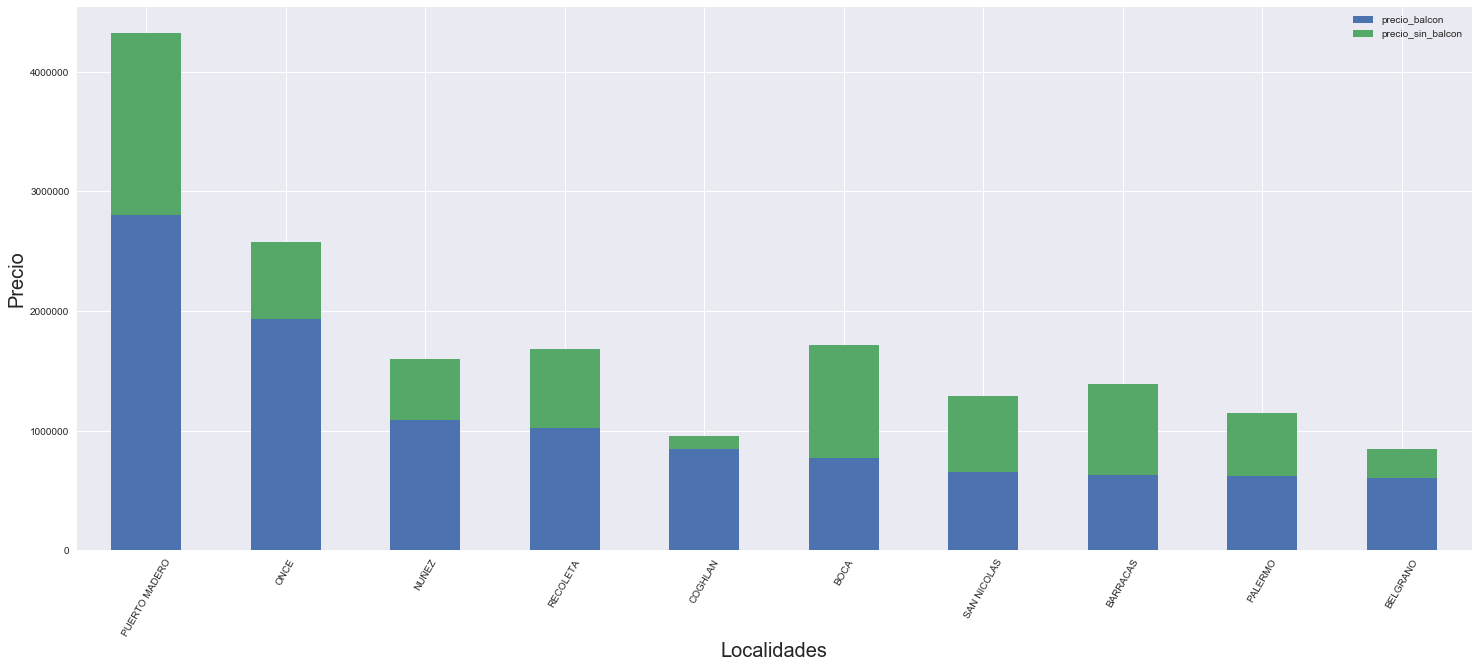

In [227]:
promedioStoreFiltered = promedioStore[['localidad', 'precio']].rename(columns={'precio':'precio_balcon'})
promedioStoreSinBalconFiltered = promedioStoreSinBalcon[['localidad', 'precio']].rename(columns={'precio':'precio_sin_balcon'})

preciosStore = pd.merge(promedioStoreFiltered,promedioStoreSinBalconFiltered, on='localidad').set_index('localidad')
preciosStore.sort_values((['precio_balcon'] + ['precio_sin_balcon']), ascending = False).head(10).plot(kind="bar", stacked=True , rot=60, figsize=(25,10))

plt.xlabel('Localidades', fontsize=20);
plt.ylabel('Precio', fontsize=20);


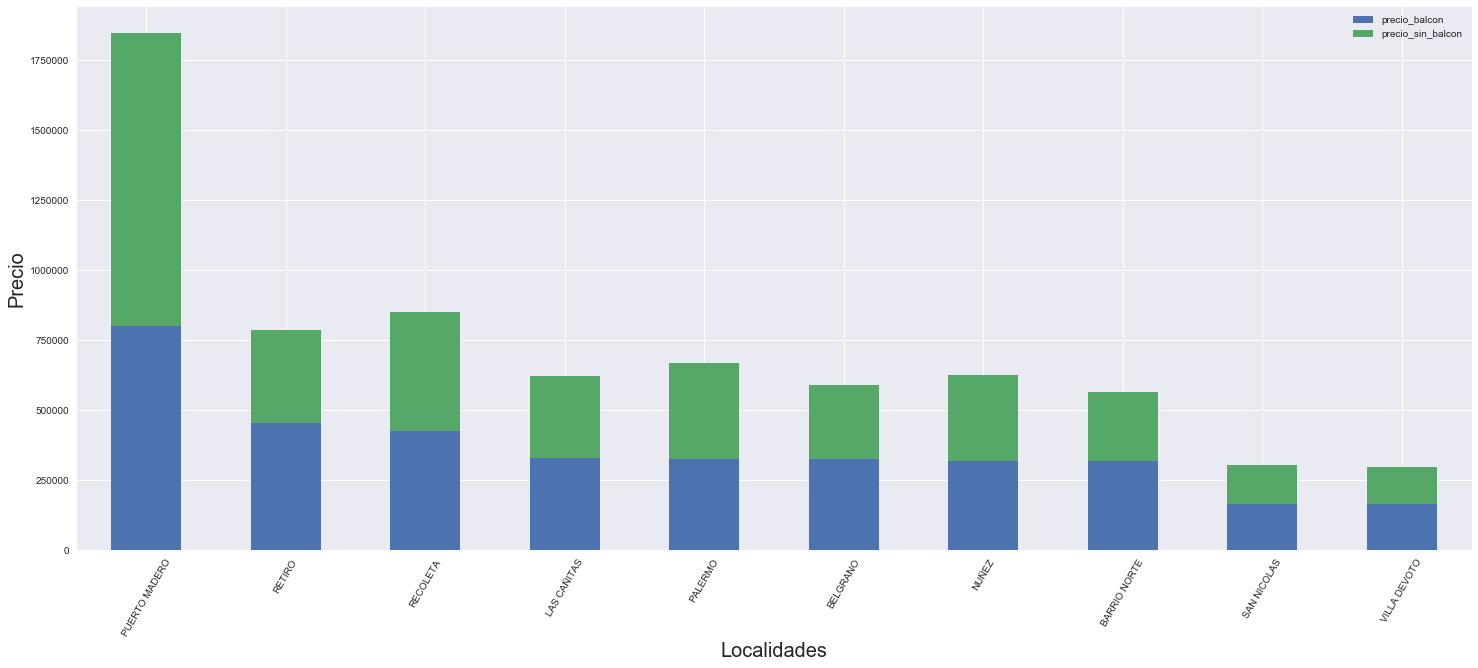

In [226]:
promedioApartmentFiltered = promedioApartment[['localidad', 'precio']].rename(columns={'precio':'precio_balcon'})
promedioApartmentSinBalconFiltered = promedioApartmentSinBalcon[['localidad', 'precio']].rename(columns={'precio':'precio_sin_balcon'})

preciosApartment = pd.merge(promedioApartmentFiltered,promedioApartmentSinBalconFiltered, on='localidad').set_index('localidad')
preciosApartment.sort_values((['precio_balcon'] + ['precio_sin_balcon']), ascending = False).head(10).plot(kind="bar", stacked=True , rot=60, figsize=(25,10))

plt.xlabel('Localidades', fontsize=20);
plt.ylabel('Precio', fontsize=20);

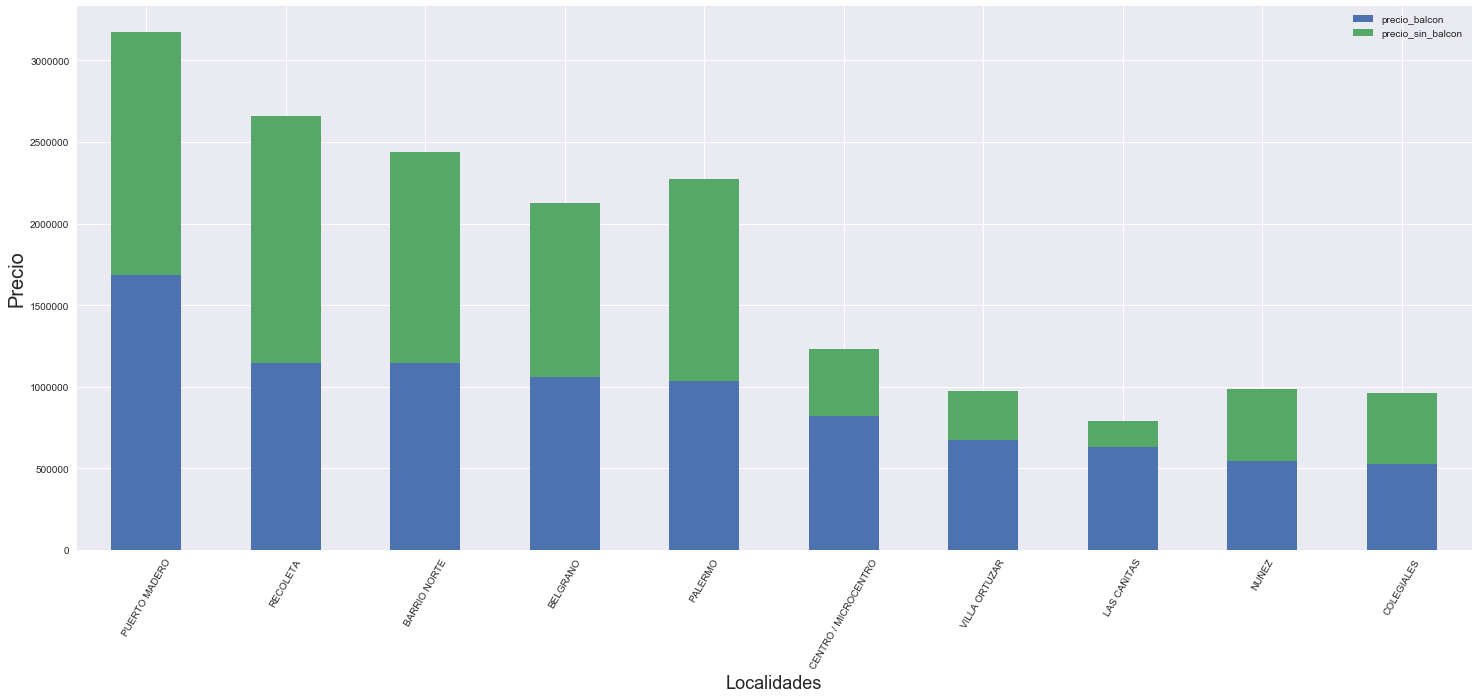

In [225]:
promedioHouseFiltered = promedioHouse[['localidad', 'precio']].rename(columns={'precio':'precio_balcon'})
promedioHouseSinBalconFiltered = promedioHouseSinBalcon[['localidad', 'precio']].rename(columns={'precio':'precio_sin_balcon'})

preciosHouse = pd.merge(promedioHouseFiltered,promedioHouseSinBalconFiltered, on='localidad').set_index('localidad')
preciosHouse.sort_values((['precio_balcon'] + ['precio_sin_balcon']), ascending = False).head(10).plot(kind="bar", stacked=True , rot=60, figsize=(25,10))

plt.xlabel('Localidades', fontsize=18);
plt.ylabel('Precio', fontsize=20);

# Expensas

In [224]:
#Precio promedio expensas por zona

expensas = datosCapital.loc[datosCapital.localidad != '',:]
expensas['expensas'] = pd.to_numeric(expensas.expensas.str.extract('(\d+[\.,]?\d*)').str.replace(',','.').str.replace(r'\.$',''))


expensas = expensas.loc[expensas['expensas'] > 1,:]
#expensas = expensas.loc[expensas.expensas != '', :].loc[expensas['expensas'] > 0,:]

#expensas.expensas = pd.to_numeric(expensas.expensas)

expensasPorZona =  expensas.groupby(['localidad', 'tipo_propiedad']).mean()
expensasPorZona = expensasPorZona[['expensas', 'precio']].reset_index()
#expensasPorZona.sort_values('expensas', ascending=False).head(10)

C:\Users\nicol\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  after removing the cwd from sys.path.


In [218]:
expensasApartment= expensasPorZona[expensasPorZona['tipo_propiedad'] == 'apartment']
expensasApartment.sort_values('expensas', ascending=False).head(10)

,localidad,tipo_propiedad,expensas,precio
30,PUERTO MADERO,apartment,2492.761111,492688.888889
18,LAS CAÑITAS,apartment,2075.250000,369744.584048
5,BARRIO NORTE,apartment,1598.569182,277226.262626
32,RETIRO,apartment,1566.675000,221400.000000
6,BELGRANO,apartment,1549.218321,262488.441190
31,RECOLETA,apartment,1432.133756,254525.185185
25,PALERMO,apartment,1408.767615,253997.956304
37,TRIBUNALES,apartment,1237.623077,158230.769231
23,NUÑEZ,apartment,1138.478049,200057.299146
27,PARQUE CHACABUCO,apartment,900.000000,153200.000000


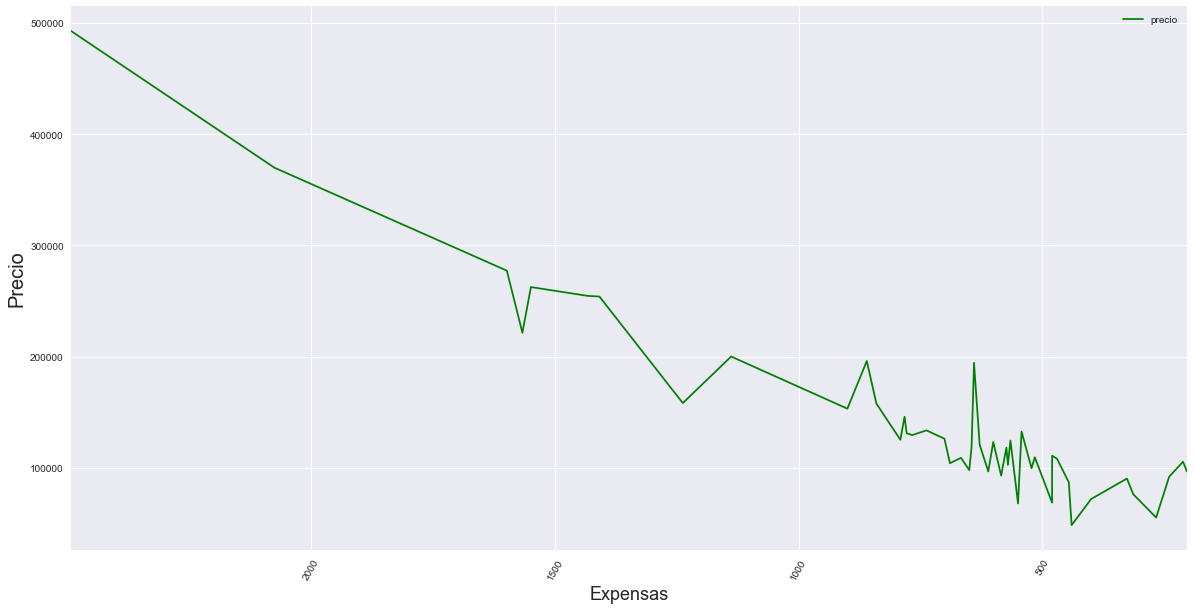

In [254]:
expensasCapitalFiltered= expensasPorZona[['precio', 'expensas']].sort_values(by='expensas', ascending=False)
expensasCapitalFiltered.set_index('expensas').plot(stacked=True , rot=60, figsize=(20,10), color="green")

plt.xlabel('Expensas', fontsize=18);
plt.ylabel('Precio', fontsize=20);

# Expensas En Buenos Aires

In [223]:
#Precio promedio expensas por zona

expensasBUE = datosBUE.loc[datosBUE.localidad != '',:]
expensasBUE['expensas'] = pd.to_numeric(expensasBUE.expensas.str.extract('(\d+[\.,]?\d*)').str.replace(',','.').str.replace(r'\.$',''))


expensasBUE = expensasBUE.loc[expensasBUE['expensas'] > 1,:]
#expensas = expensas.loc[expensas.expensas != '', :].loc[expensas['expensas'] > 0,:]

#expensas.expensas = pd.to_numeric(expensas.expensas)

expensasBUEPorZona =  expensasBUE.groupby(['localidad', 'tipo_propiedad']).mean()
expensasBUEPorZona = expensasBUEPorZona[['expensas', 'precio']].reset_index()
expensasBUEPorZona.sort_values('expensas', ascending=False).head(10)

C:\Users\nicol\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  after removing the cwd from sys.path.


,localidad,tipo_propiedad,expensas,precio
13,Tigre,apartment,1356.659630,178242.673333
1,Esteban Echeverría,apartment,1350.000000,270856.552500
7,Lomas de Zamora,apartment,1180.000000,181000.000000
2,Ezeiza,apartment,1100.000000,85000.000000
15,Vicente López,apartment,978.448276,206687.356322
12,San Isidro,apartment,919.435246,198661.426230
9,Pilar,apartment,884.164835,104348.130000
6,Lanús,apartment,568.407407,122323.032963
10,Quilmes,apartment,567.666667,125308.092593
11,San Fernando,apartment,380.825688,109971.179725


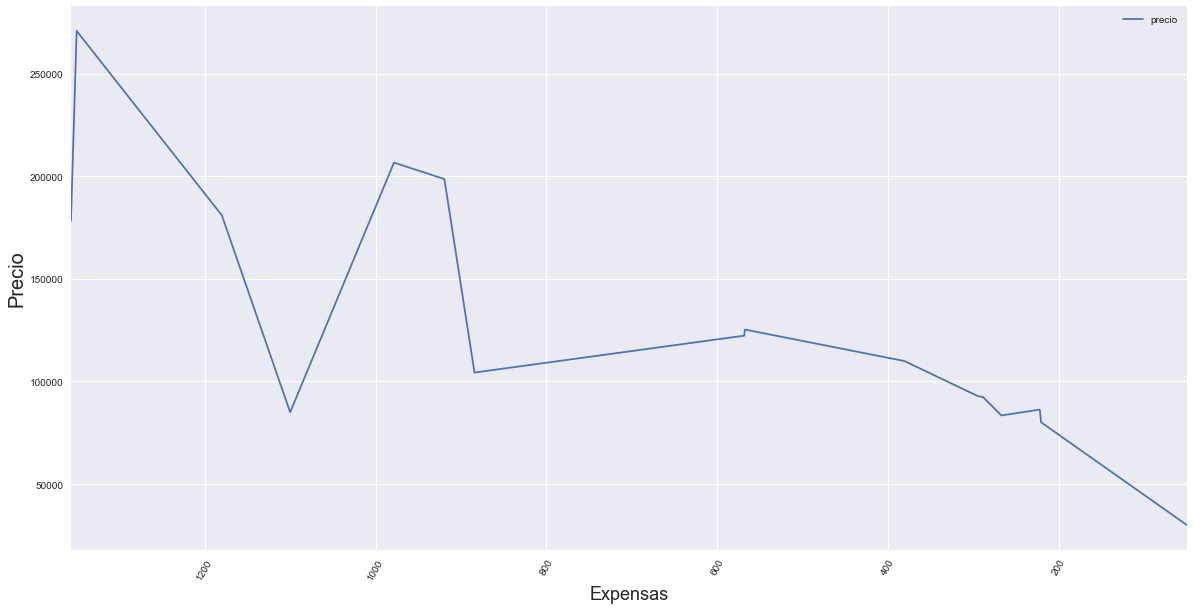

In [255]:
expensasBUEFiltered = expensasBUEPorZona[['precio', 'expensas']].sort_values(by='expensas', ascending=False)

expensasBUEFiltered.set_index('expensas').plot(stacked=True , rot=60, figsize=(20,10))

plt.xlabel('Expensas', fontsize=18);
plt.ylabel('Precio', fontsize=20);

# Habitaciones

In [92]:
#Hay además de departamentos, hoteles. 
#Habría que filtrar todo aquello que NO sea hoteles, o bien, tratarlos como categoría aparte. 

datosCapitalByRooms = datosCapital[datosCapital['habitaciones'] < 7]
datosCapitalByRooms = datosCapital[datosCapital['habitaciones'] > 0]
datosCapitalByRooms = datosCapital[pd.isnull(datosCapital['habitaciones']) != True]

datosCapitalByRoomsGP = datosCapitalByRooms.groupby(['localidad','tipo_propiedad']).mean()
datosCapitalByRoomsGPFiltered = datosCapitalByRoomsGP[['habitaciones','precio']].reset_index()
#datosCapitalByRoomsGPFiltered.sort_values('price', ascending=False).head(10)

In [93]:
promedioRoomsAparment = datosCapitalByRoomsGPFiltered[datosCapitalByRoomsGPFiltered['tipo_propiedad'] == 'apartment']
promedioRoomsAparment.sort_values('habitaciones', ascending=False).head(10)

,localidad,tipo_propiedad,habitaciones,precio
39,CATALINAS,apartment,5.000000,590000.000000
199,VILLA SOLDATI,apartment,3.565217,55040.401739
130,RECOLETA,apartment,3.482574,402631.324751
134,RETIRO,apartment,3.353823,364430.307511
20,BARRIO NORTE,apartment,3.049700,285947.411299
194,VILLA RIACHUELO,apartment,3.000000,85000.000000
126,PUERTO MADERO,apartment,2.904385,788441.066870
98,ONCE,apartment,2.904040,126126.629583
177,VILLA LUGANO,apartment,2.818182,71948.883292
63,DISTRITO DE LAS ARTES,apartment,2.700000,120094.085500


In [94]:
promedioRoomsHouse = datosCapitalByRoomsGPFiltered[datosCapitalByRoomsGPFiltered['tipo_propiedad'] == 'house']
promedioRoomsHouse.sort_values('habitaciones', ascending=False).head(10)

,localidad,tipo_propiedad,habitaciones,precio
150,SAN TELMO,house,8.200000,7.893333e+05
99,ONCE,house,7.333333,2.716667e+05
135,RETIRO,house,7.000000,2.500000e+06
85,MONSERRAT,house,5.888889,4.414222e+05
62,CONSTITUCIÓN,house,5.800000,2.930000e+05
127,PUERTO MADERO,house,5.750000,7.175000e+05
29,BOCA,house,5.370370,2.288519e+05
142,SAN CRISTOBAL,house,5.344828,2.948690e+05
6,AGRONOMÍA,house,5.100000,3.470000e+05
25,BELGRANO,house,4.984043,7.824502e+05


In [95]:
promedioRoomsPH = datosCapitalByRoomsGPFiltered[datosCapitalByRoomsGPFiltered['tipo_propiedad'] == 'PH']
promedioRoomsPH.sort_values('habitaciones', ascending=False).head(10)

,localidad,tipo_propiedad,habitaciones,precio
125,PUERTO MADERO,PH,5.000000,203500.000000
40,CENTRO / MICROCENTRO,PH,5.000000,147444.444444
56,CONGRESO,PH,4.303571,163464.285714
97,ONCE,PH,4.260870,157347.826087
148,SAN TELMO,PH,4.161538,207870.968385
11,BALVANERA,PH,3.967949,165993.005705
60,CONSTITUCIÓN,PH,3.934426,128852.459016
129,RECOLETA,PH,3.826087,210456.521739
27,BOCA,PH,3.805556,133153.597917
140,SAN CRISTOBAL,PH,3.787234,160291.190780


In [96]:
promedioRoomsStore = datosCapitalByRoomsGPFiltered[datosCapitalByRoomsGPFiltered['tipo_propiedad'] == 'store']
promedioRoomsStore.sort_values('habitaciones', ascending=False).head(10)

,localidad,tipo_propiedad,habitaciones,precio
186,VILLA ORTUZAR,store,10.000000,360000.0
151,SAN TELMO,store,7.750000,899375.0
167,VILLA DEL PARQUE,store,7.000000,760000.0
43,CENTRO / MICROCENTRO,store,7.000000,0.0
38,CABALLITO,store,5.500000,214000.0
124,PATERNAL,store,5.250000,312500.0
22,BARRIO NORTE,store,3.900000,717500.0
34,BOEDO,store,3.666667,472000.0
30,BOCA,store,3.600000,187600.0
171,VILLA DEVOTO,store,3.500000,257500.0


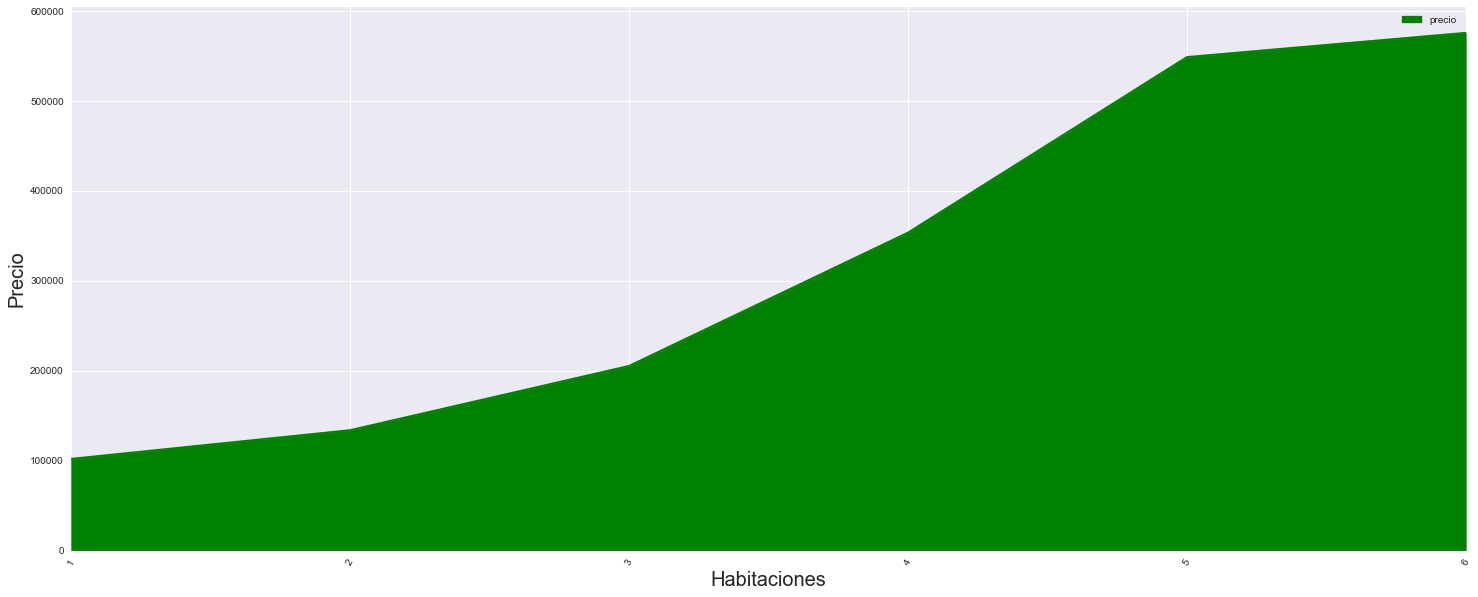

In [97]:
roomsCapital = datosCapitalByRooms.groupby('habitaciones').mean().reset_index()
roomsCapital.sort_values('habitaciones')

precioHabitaciones = roomsCapital[['habitaciones', 'precio']]
precioHabitaciones = precioHabitaciones[precioHabitaciones['habitaciones'] > 0]
precioHabitaciones = precioHabitaciones[precioHabitaciones['habitaciones'] < 7]
precioHabitaciones = precioHabitaciones.set_index('habitaciones')

precioHabitaciones.plot(kind='area', rot=60, figsize=(25,10), color='green')

plt.xlabel('Habitaciones', fontsize=20);
plt.ylabel('Precio', fontsize=20);

# Precio por habitaciones Buenos Aires

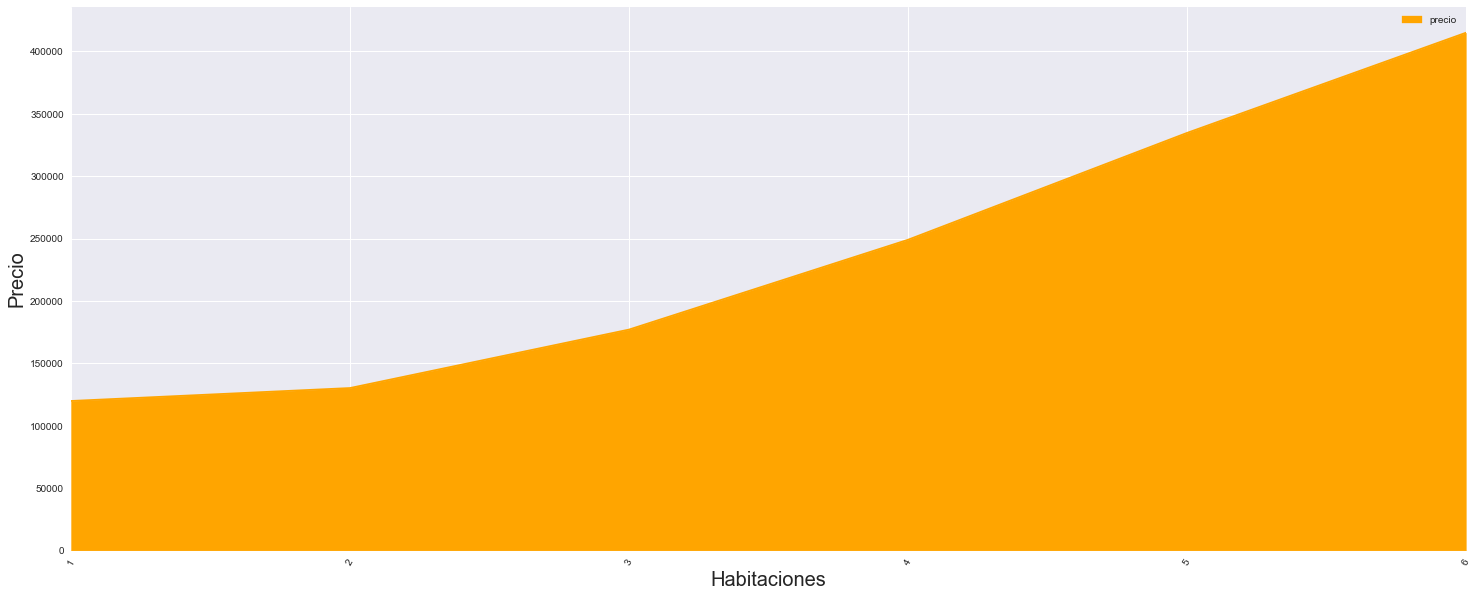

In [98]:
datosBUEByRooms = datosBUE[datosBUE['habitaciones'] < 7]
datosBUEByRooms = datosBUE[datosBUE['habitaciones'] > 0]
datosBUEByRooms = datosBUE[pd.isnull(datosBUE['habitaciones']) != True]

roomsBUE = datosBUEByRooms.groupby('habitaciones').mean().reset_index()

precioHabitacionesBUE = roomsBUE[['habitaciones', 'precio']]
precioHabitacionesBUE = precioHabitacionesBUE[precioHabitacionesBUE['habitaciones'] > 0]
precioHabitacionesBUE = precioHabitacionesBUE[precioHabitacionesBUE['habitaciones'] < 7]
precioHabitacionesBUE = precioHabitacionesBUE.set_index('habitaciones')

precioHabitacionesBUE.plot(kind='area', rot=60, figsize=(25,10), color='orange')

plt.xlabel('Habitaciones', fontsize=20);
plt.ylabel('Precio', fontsize=20);

# Tipos de propiedades en Gran Buenos Aires


In [126]:
#datosBUE.head(10)

In [100]:
datosBUE['total'] = 1
totalDatosPropiedadesBUE = datosBUE.groupby(['tipo_propiedad']).sum()
totalDatosPropiedadesBUE = totalDatosPropiedadesBUE[['total']].reset_index()
#totalDatosCapitalByPlaces = totalDatosCapitalByPlaces.sort_values('total', ascending=False)
totalDatosPropiedadesBUE.sort_values('total', ascending=False).head(5)

C:\Users\nicol\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,tipo_propiedad,total
1,apartment,104351
2,house,103965
0,PH,14072
3,store,3402


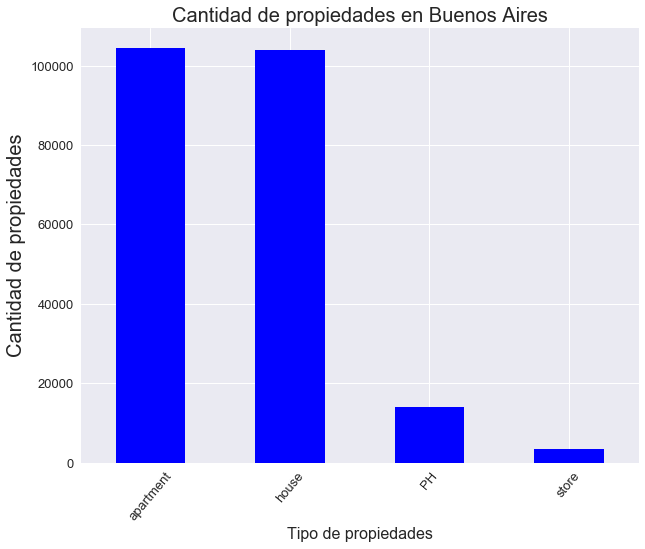

In [101]:
datosBUE['tipo_propiedad'].value_counts().plot(kind='bar', rot=50, figsize=(10,8), color='blue' ,fontsize=13);
plt.title('Cantidad de propiedades en Buenos Aires', fontsize=20);
plt.xlabel('Tipo de propiedades', fontsize=16);
plt.ylabel('Cantidad de propiedades', fontsize=20);

La conclusion es que la distribución de casas y departamento en Buenos Aires es más equitativa con respecto a Capital Federal

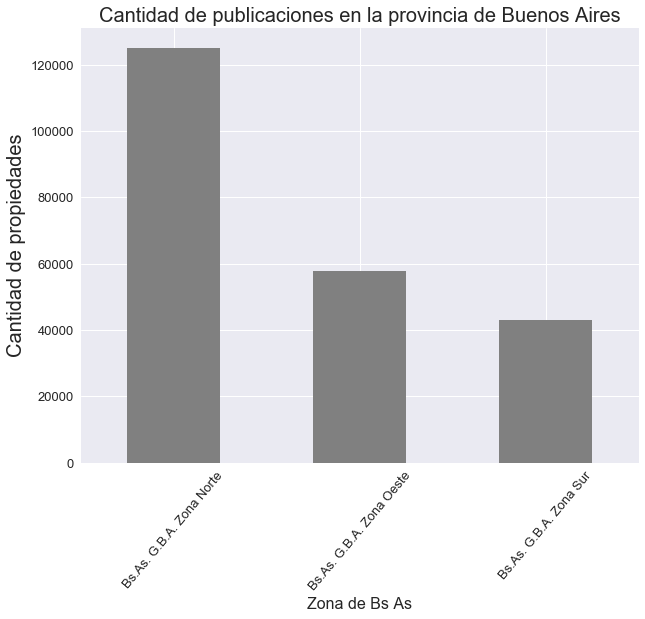

In [102]:
totalPropiedadesBUE_top5 = datosBUE['provincia'].value_counts().sort_values(ascending=False)
totalPropiedadesBUE_top5 = totalPropiedadesBUE_top5.head(5)

totalPropiedadesBUE_top5.plot(kind='bar', rot=50, figsize=(10,8), color='grey' ,fontsize=13);

plt.title('Cantidad de publicaciones en la provincia de Buenos Aires', fontsize=20);
plt.xlabel('Zona de Bs As', fontsize=16);
plt.ylabel('Cantidad de propiedades', fontsize=20);

In [103]:
totalPropiedadesLocBUE_top20 = datosBUE['localidad'].value_counts().sort_values(ascending=False)
totalPropiedadesLocBUE_top20 = totalPropiedadesLocBUE_top20.head(20)

totalPropiedadesLocBUE_top20

Tigre                  37567
La Matanza             20112
Pilar                  19883
Vicente López          18997
Morón                  15653
San Isidro             15034
La Plata               11842
General San Martín     10037
Lanús                   8951
Tres de Febrero         7927
Escobar                 7012
San Fernando            6758
San Miguel              6389
Ituzaingó               6311
Lomas de Zamora         6082
Quilmes                 3744
Almirante Brown         3668
Moreno                  3385
Malvinas Argentinas     2473
Merlo                   2290
Name: localidad, dtype: int64

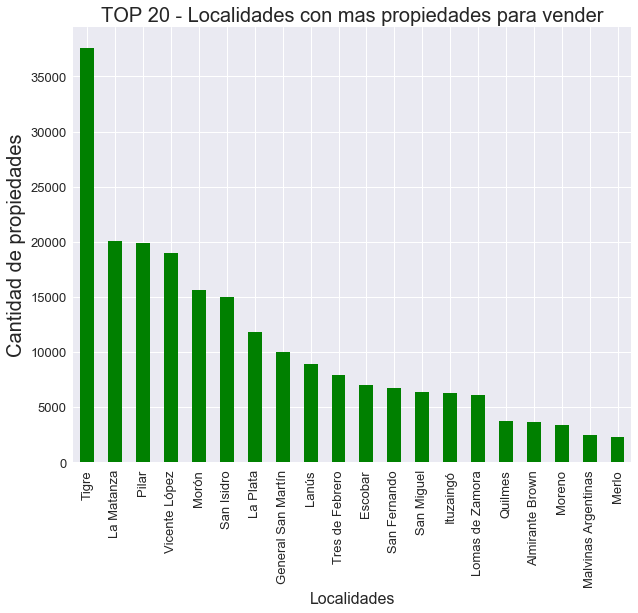

In [104]:
totalPropiedadesLocBUE_top20.plot(kind='bar', rot=90, figsize=(10,8), color='green' ,fontsize=13);

plt.title('TOP 20 - Localidades con mas propiedades para vender', fontsize=20);
plt.xlabel('Localidades', fontsize=16);
plt.ylabel('Cantidad de propiedades', fontsize=20);

Como se ve, la cantidad de ventas en zona norte es ampliamente superior al de zona sur y zona oeste. Entre las seis localidades con más ventas, cuatro corresponde a localidades de zona norte y dos a zona oeste.

In [105]:
datosBUE['total'] = 1
propiedades_BUE_ph  = datosBUE[['localidad','tipo_propiedad', 'total']][datosBUE['tipo_propiedad']=='PH'].groupby('localidad').sum()
propiedades_BUE_ph = propiedades_BUE_ph[['total']].reset_index()
propiedades_BUE_ph.sort_values('total', ascending=False).head(10)

C:\Users\nicol\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,localidad,total
8,General San Martín,2080
12,La Matanza,1950
20,Morón,1582
29,Vicente López,1514
14,Lanús,1268
13,La Plata,996
28,Tres de Febrero,960
24,San Isidro,841
10,Ituzaingó,431
23,San Fernando,427


In [106]:
propiedades_BUE_apartment  = datosBUE[['localidad','tipo_propiedad', 'total']][datosBUE['tipo_propiedad']=='apartment'].groupby('localidad').sum()
propiedades_BUE_apartment = propiedades_BUE_apartment[['total']].reset_index()
propiedades_BUE_apartment.sort_values('total', ascending=False).head(10)

,localidad,total
29,Tigre,17806
13,La Matanza,11391
31,Vicente López,11387
22,Pilar,8692
21,Morón,8208
26,San Isidro,6786
14,La Plata,6202
30,Tres de Febrero,4673
15,Lanús,4598
25,San Fernando,4299


In [107]:
propiedades_BUE_house  = datosBUE[['localidad','tipo_propiedad', 'total']][datosBUE['tipo_propiedad']=='house'].groupby('localidad').sum()
propiedades_BUE_house = propiedades_BUE_house[['total']].reset_index()
propiedades_BUE_house.sort_values('total', ascending=False).head(10)

,localidad,total
29,Tigre,19547
22,Pilar,10933
26,San Isidro,7021
13,La Matanza,6409
4,Escobar,6123
31,Vicente López,5834
21,Morón,5639
11,Ituzaingó,4957
14,La Plata,4396
9,General San Martín,3570


In [108]:
propiedades_BUE_store  = datosBUE[['localidad','tipo_propiedad', 'total']][datosBUE['tipo_propiedad']=='store'].groupby('localidad').sum()
propiedades_BUE_store = propiedades_BUE_store[['total']].reset_index()
propiedades_BUE_store.sort_values('total', ascending=False).head(10)

,localidad,total
26,San Isidro,386
13,La Matanza,362
16,Lomas de Zamora,307
31,Vicente López,262
14,La Plata,248
15,Lanús,233
21,Morón,224
9,General San Martín,204
22,Pilar,178
29,Tigre,139


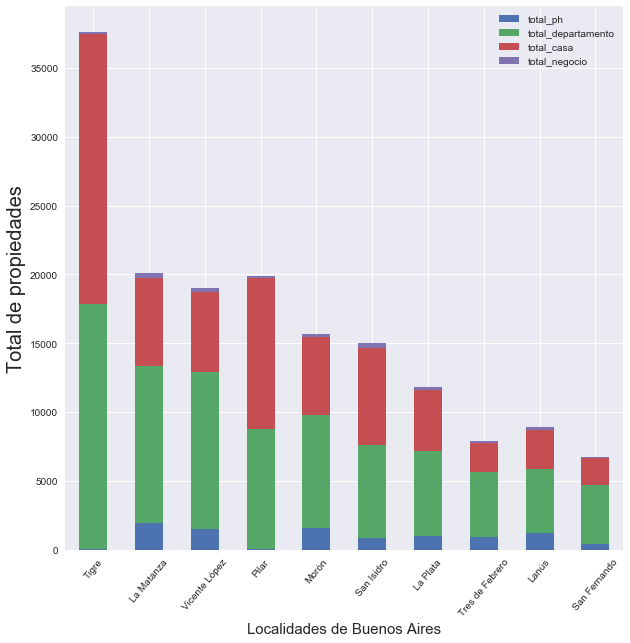

In [109]:
propiedades_BUE_ph  = datosBUE[['localidad','tipo_propiedad']][datosBUE['tipo_propiedad']=='PH'].groupby('localidad').count()
propiedades_BUE_departamento  = datosBUE[['localidad','tipo_propiedad']][datosBUE['tipo_propiedad']=='apartment'].groupby('localidad').count()
propiedades_BUE_casa  = datosBUE[['localidad','tipo_propiedad']][datosBUE['tipo_propiedad']=='house'].groupby('localidad').count()
propiedades_BUE_negocio  = datosBUE[['localidad','tipo_propiedad']][datosBUE['tipo_propiedad']=='store'].groupby('localidad').count()

propiedades_BUE_ph.rename(columns={'tipo_propiedad': 'total_ph'}, inplace=True)
propiedades_BUE_departamento.rename(columns={'tipo_propiedad': 'total_departamento'}, inplace=True)
propiedades_BUE_casa.rename(columns={'tipo_propiedad': 'total_casa'}, inplace=True)
propiedades_BUE_negocio.rename(columns={'tipo_propiedad': 'total_negocio'}, inplace=True)

merge_tipo_prop_x_barrio = pd.merge(pd.merge(pd.merge(propiedades_BUE_ph, propiedades_BUE_departamento,right_index=True, left_index=True),propiedades_BUE_casa,right_index=True, left_index=True), propiedades_BUE_negocio,right_index=True, left_index=True)
merge_tipo_prop_x_barrio_top10 = merge_tipo_prop_x_barrio.sort_values('total_departamento',ascending=False).head(10)

merge_tipo_prop_x_barrio_top10.plot(kind="bar", stacked=True , rot=50, figsize=(10,10))
plt.xlabel('Localidades de Buenos Aires', fontsize=15);
plt.ylabel('Total de propiedades', fontsize=20);

# Variación de precios según fechas

C:\Users\nicol\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\nicol\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\nicol\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

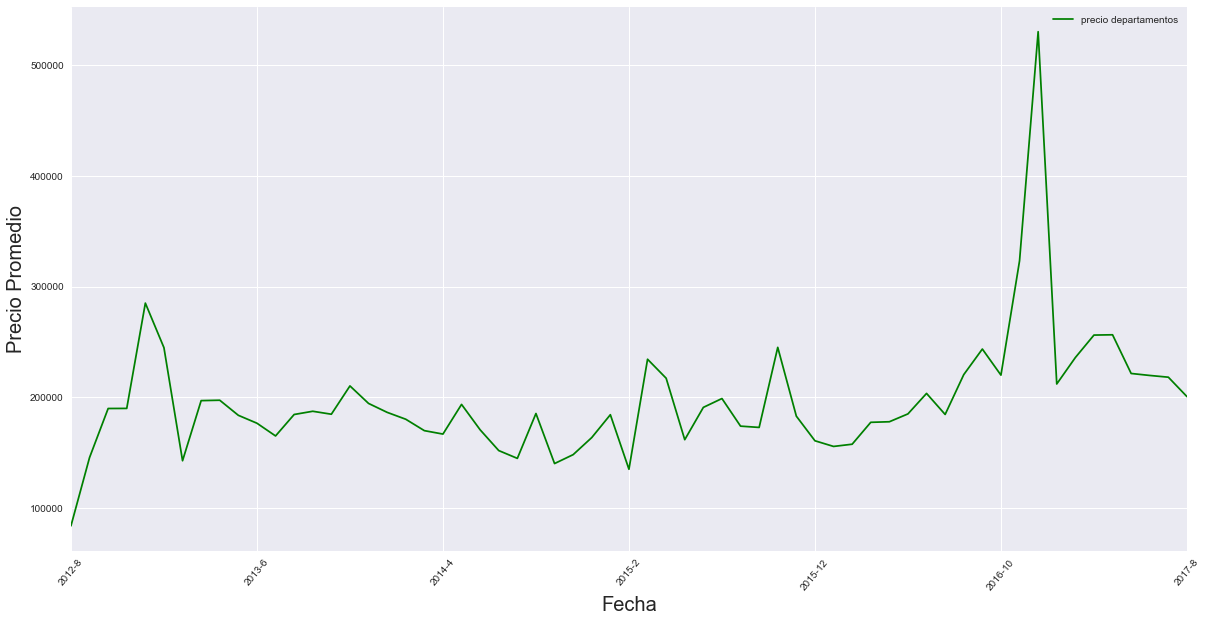

In [127]:
datosCapital['fecha'] = pd.to_datetime(datosCapital['fecha'], errors='coerce')
datosCapital['month'] = datosCapital['fecha'].dt.month
datosCapital['year'] = datosCapital['fecha'].dt.year

datosCapitalByYearMonth = datosCapital.groupby(['year','month','tipo_propiedad']).mean().reset_index()
datosCapitalByYearMonthFiltered = datosCapitalByYearMonth[['year','month','tipo_propiedad','precio']]

apartmentByMonthYear = datosCapitalByYearMonthFiltered[datosCapitalByYearMonth['tipo_propiedad'] == 'apartment']
#apartmentByMonthYear.sort_values(['year','month'], ascending=False)

apartmentByMonthYear['month_year'] =apartmentByMonthYear['year'].astype(str) + '-' + apartmentByMonthYear['month'].astype(str)
graficoApartment = apartmentByMonthYear[['month_year','precio']].set_index('month_year')
graficoApartment.rename(columns={'precio':'precio departamentos'},inplace=True)
graficoApartment.head()
graficoApartment.plot(stacked=True , rot=50, figsize=(20,10), color='green')

plt.xlabel('Fecha', fontsize=20);
plt.ylabel('Precio Promedio', fontsize=20);

C:\Users\nicol\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


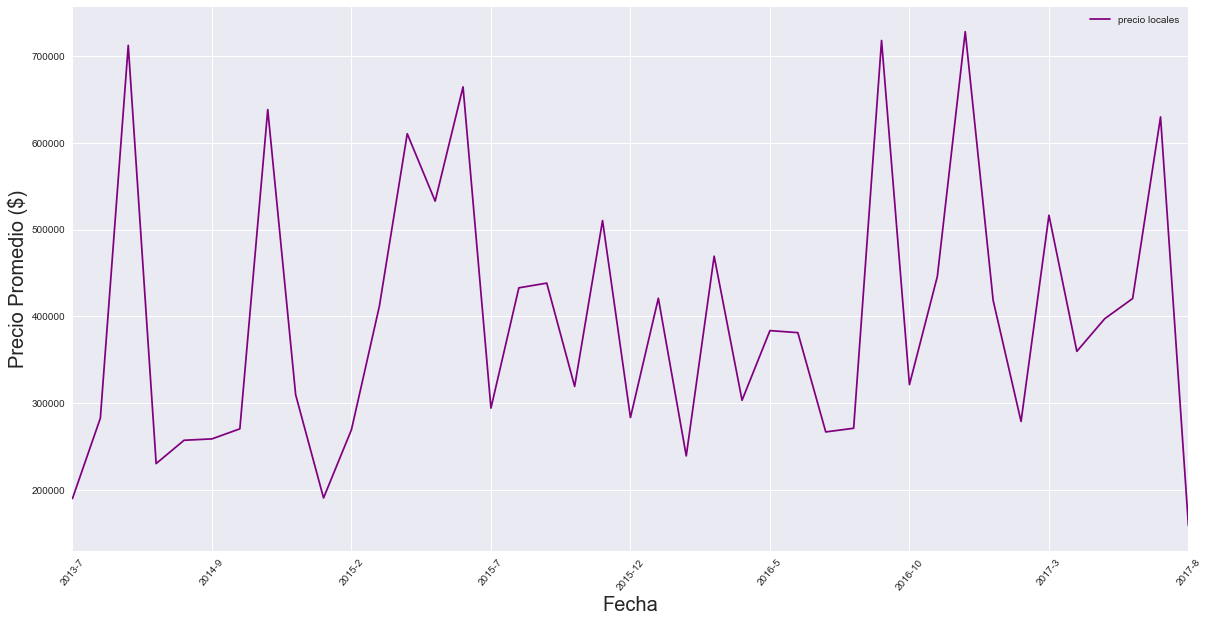

In [128]:
storeByMonthYear = datosCapitalByYearMonthFiltered[datosCapitalByYearMonth['tipo_propiedad'] == 'store']
#storeByMonthYear.sort_values(['year','month'], ascending=False)

storeByMonthYear['month_year'] =storeByMonthYear['year'].astype(str) + '-' + storeByMonthYear['month'].astype(str)
graficoStoreAnio = storeByMonthYear[['month_year','precio']].set_index('month_year')
graficoStoreAnio.rename(columns={'precio':'precio locales'},inplace=True)
graficoStore.head()
graficoStoreAnio.plot(stacked=True , rot=50, figsize=(20,10), color='purple')

plt.xlabel('Fecha', fontsize=20);
plt.ylabel('Precio Promedio ($)', fontsize=20);

C:\Users\nicol\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


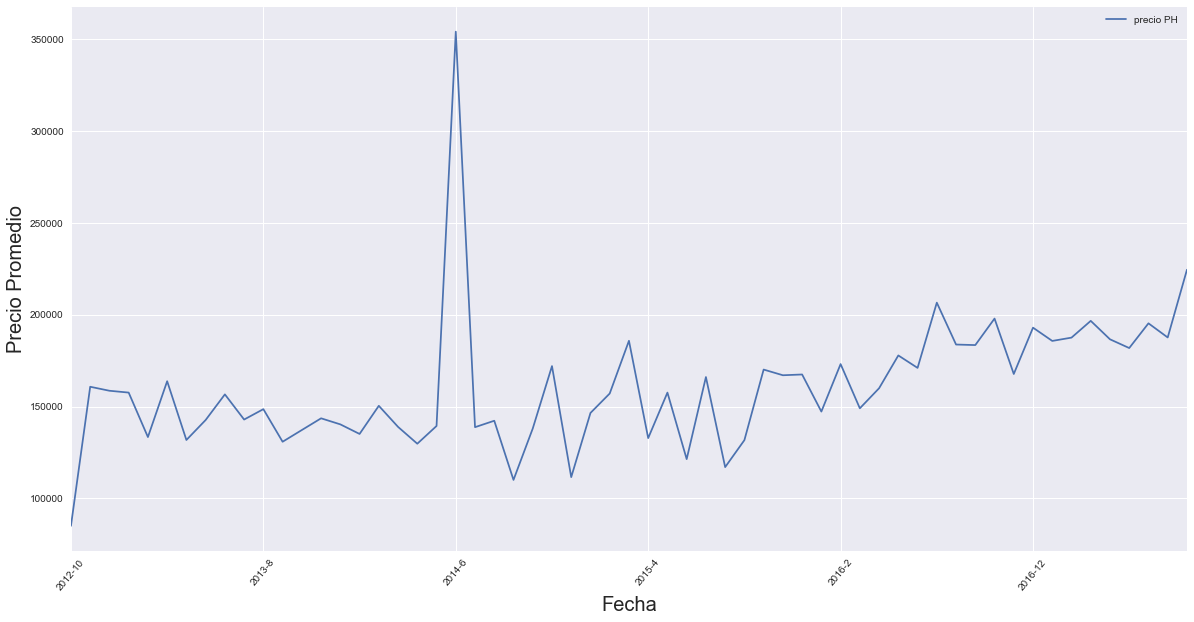

In [129]:
PHByMonthYear = datosCapitalByYearMonthFiltered[datosCapitalByYearMonth['tipo_propiedad'] == 'PH']

PHByMonthYear['month_year'] =PHByMonthYear['year'].astype(str) + '-' + PHByMonthYear['month'].astype(str)
graficoPHAnio = PHByMonthYear[['month_year','precio']].set_index('month_year')
graficoPHAnio.rename(columns={'precio':'precio PH'},inplace=True)

graficoPHAnio.plot(stacked=True , rot=50, figsize=(20,10))

plt.xlabel('Fecha', fontsize=20);
plt.ylabel('Precio Promedio', fontsize=20);

#PHByMonthYear.sort_values(['year','month'], ascending=False)

C:\Users\nicol\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


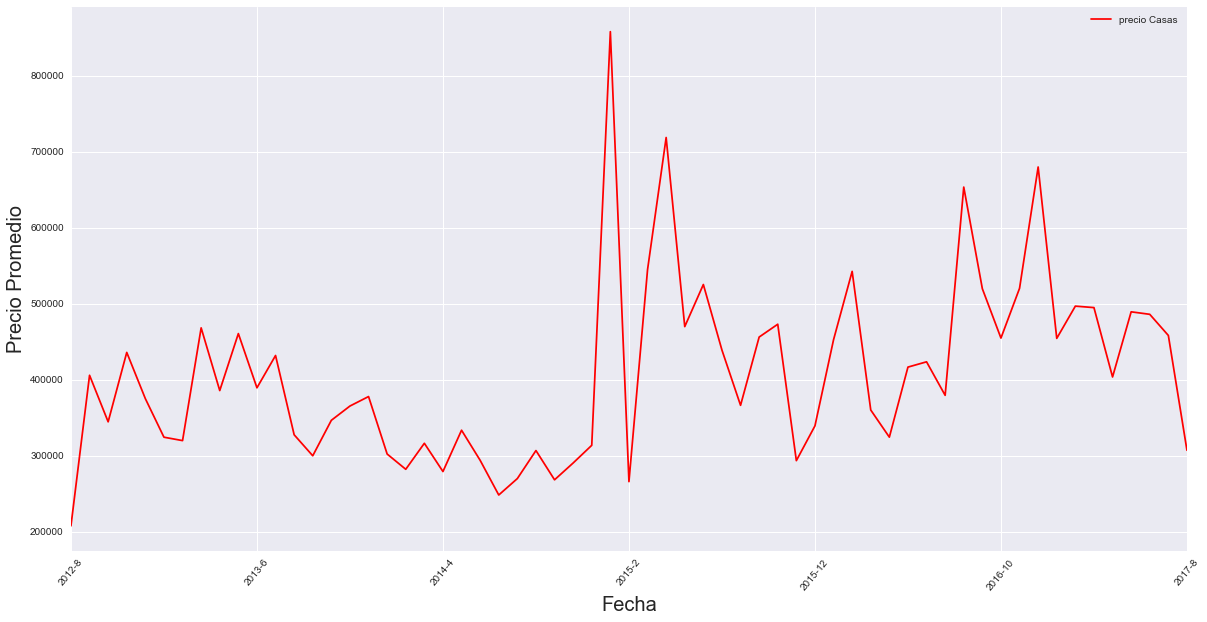

In [130]:
houseByMonthYear = datosCapitalByYearMonthFiltered[datosCapitalByYearMonth['tipo_propiedad'] == 'house']
#houseByMonthYear.sort_values(['year','month'], ascending=False)

houseByMonthYear['month_year'] =houseByMonthYear['year'].astype(str) + '-' + houseByMonthYear['month'].astype(str)
graficoHouseAnio = houseByMonthYear[['month_year','precio']].set_index('month_year')
graficoHouseAnio.rename(columns={'precio':'precio Casas'},inplace=True)

graficoHouseAnio.plot(stacked=True , rot=50, figsize=(20,10), color='red')

plt.xlabel('Fecha', fontsize=20);
plt.ylabel('Precio Promedio', fontsize=20);

## Se puede observar que los precios, en general, aumentaron conforme al transcurso del tiempo.

# Cantidades Por Fechas

C:\Users\nicol\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\nicol\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


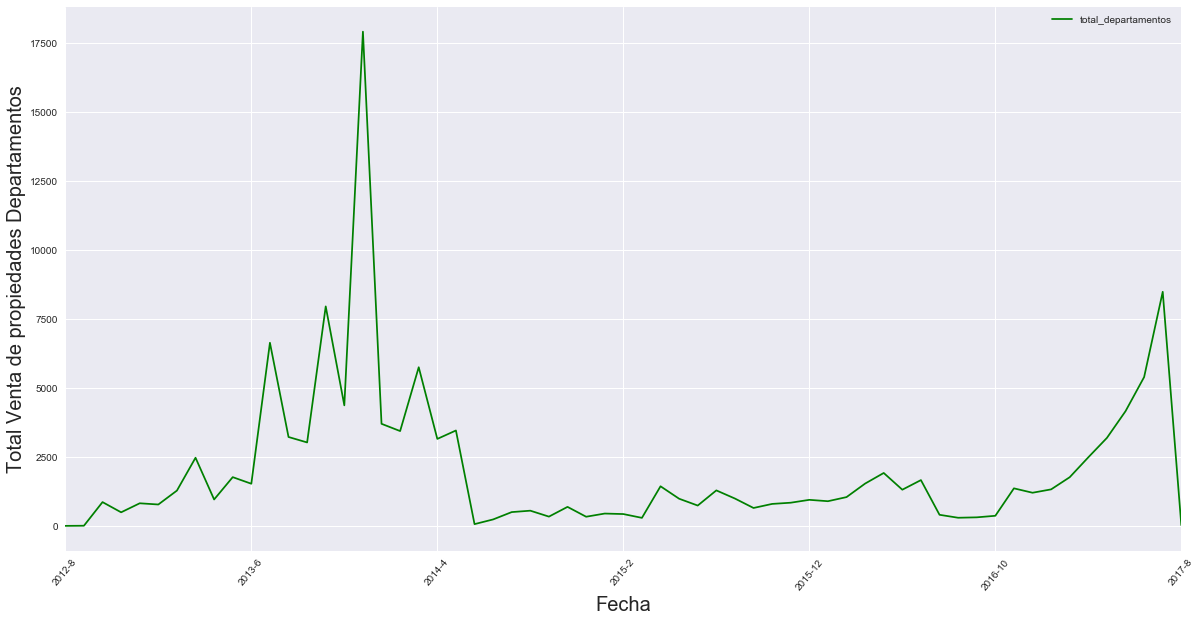

In [132]:
datosCapital['total'] = 1
totalDatosCapitalByYearMonth = datosCapital.groupby(['year','month','tipo_propiedad']).sum().reset_index()
totalDatosCapitalByYearMonthFiltered = totalDatosCapitalByYearMonth[['year','month','tipo_propiedad','total']]

totalApartmentByMonthYear = totalDatosCapitalByYearMonthFiltered[totalDatosCapitalByYearMonthFiltered['tipo_propiedad'] == 'apartment']
#totalApartmentByMonthYear.sort_values(['year','month'], ascending=False)

totalApartmentByMonthYear['month_year'] =totalApartmentByMonthYear['year'].astype(str) + '-' + totalApartmentByMonthYear['month'].astype(str)
graficoCantidadApartment = totalApartmentByMonthYear[['month_year','total']].set_index('month_year')
graficoCantidadApartment.rename(columns={'total':'total_departamentos'},inplace=True)

graficoCantidadApartment.plot(stacked=True , rot=50, figsize=(20,10), color='green')

plt.xlabel('Fecha', fontsize=20);
plt.ylabel('Total Venta de propiedades Departamentos', fontsize=20);


C:\Users\nicol\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


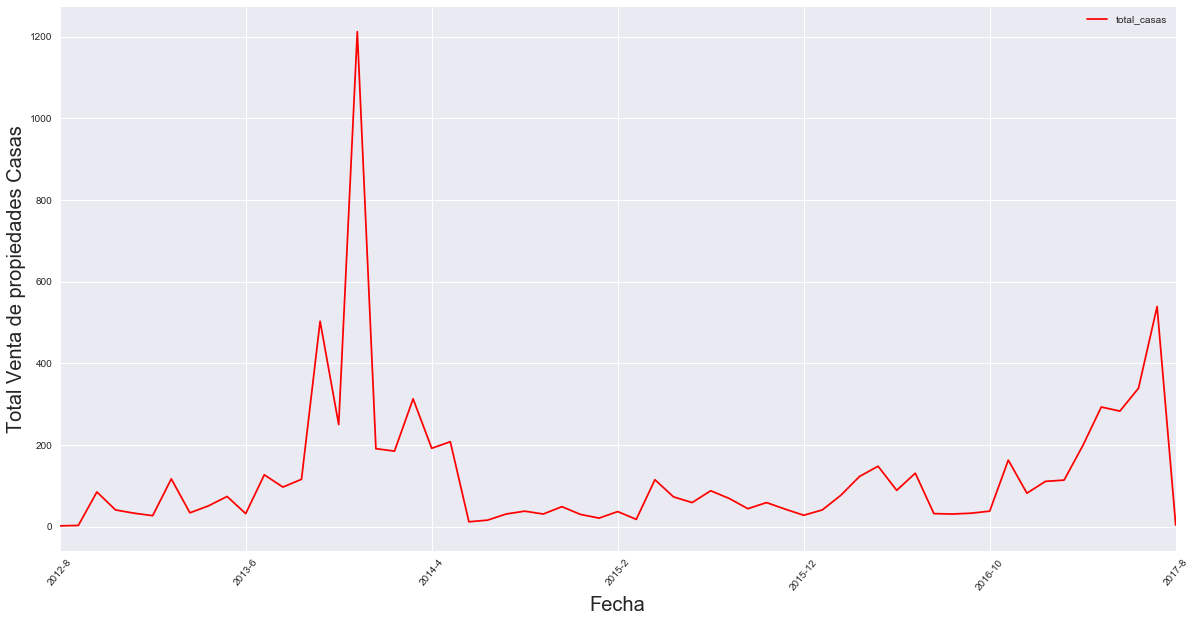

In [134]:
totalHouseByMonthYear = totalDatosCapitalByYearMonthFiltered[totalDatosCapitalByYearMonthFiltered['tipo_propiedad'] == 'house']
#totalHouseByMonthYear.sort_values(['year','month'], ascending=False)

totalHouseByMonthYear['month_year'] =totalHouseByMonthYear['year'].astype(str) + '-' + totalHouseByMonthYear['month'].astype(str)
graficoCantidadHouse = totalHouseByMonthYear[['month_year','total']].set_index('month_year')
graficoCantidadHouse.rename(columns={'total':'total_casas'},inplace=True)

graficoCantidadHouse.plot(stacked=True , rot=50, figsize=(20,10), color='red')

plt.xlabel('Fecha', fontsize=20);
plt.ylabel('Total Venta de propiedades Casas', fontsize=20);

C:\Users\nicol\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


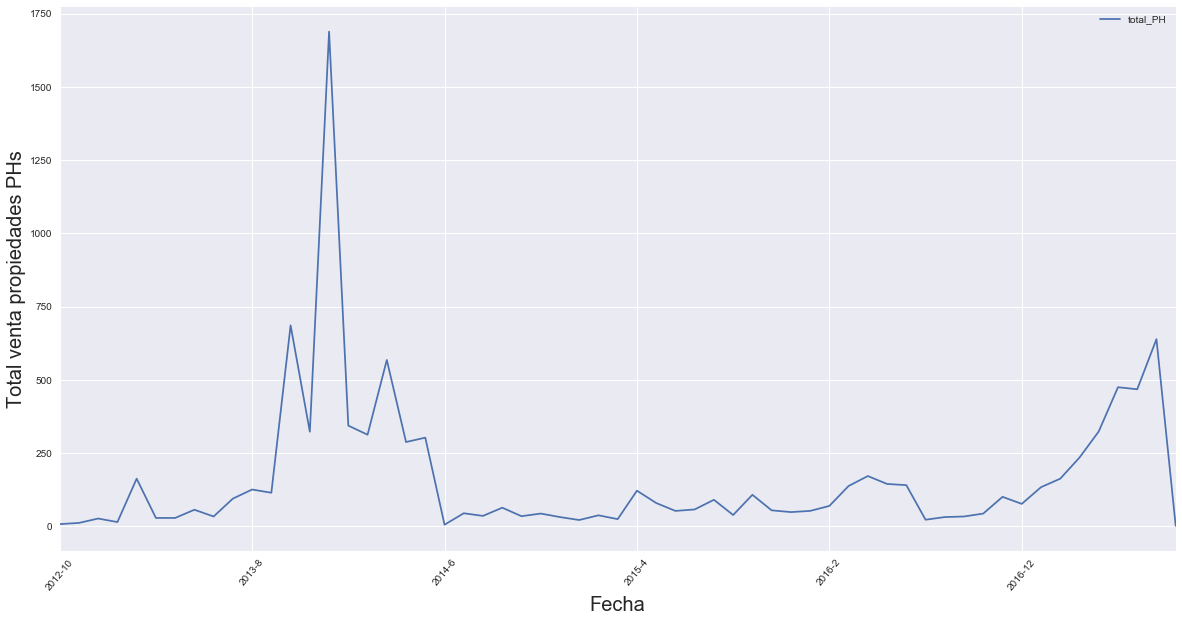

In [135]:
totalPHByMonthYear = totalDatosCapitalByYearMonthFiltered[totalDatosCapitalByYearMonthFiltered['tipo_propiedad'] == 'PH']
#totalPHByMonthYear.sort_values(['year','month'], ascending=False)

totalPHByMonthYear['month_year'] =totalPHByMonthYear['year'].astype(str) + '-' + totalPHByMonthYear['month'].astype(str)
graficoCantidadPH = totalPHByMonthYear[['month_year','total']].set_index('month_year')
graficoCantidadPH.rename(columns={'total':'total_PH'},inplace=True)

graficoCantidadPH.plot(stacked=True , rot=50, figsize=(20,10))

plt.xlabel('Fecha', fontsize=20);
plt.ylabel('Total venta propiedades PHs', fontsize=20);

C:\Users\nicol\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


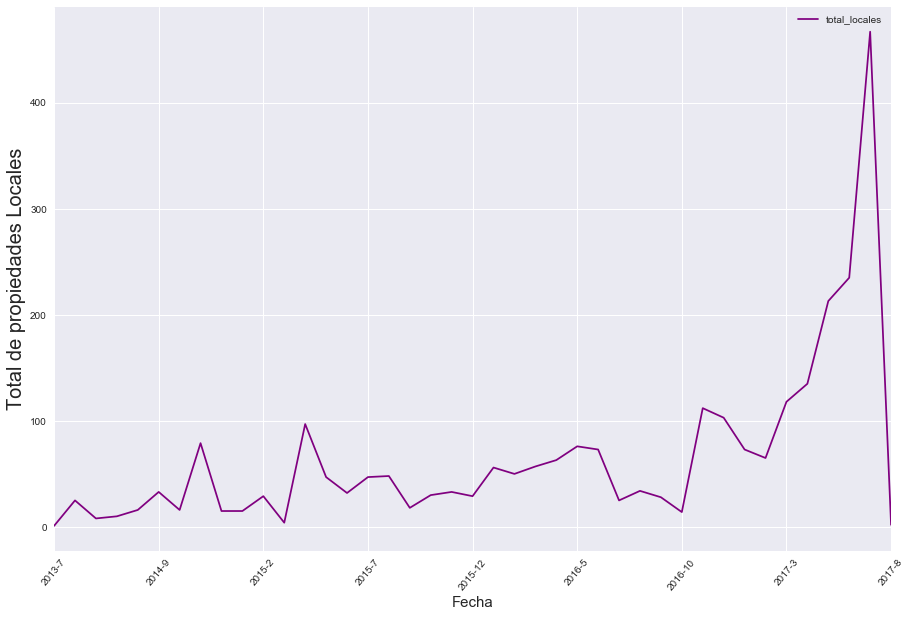

In [136]:
totalStoreByMonthYear = totalDatosCapitalByYearMonthFiltered[totalDatosCapitalByYearMonthFiltered['tipo_propiedad'] == 'store']
#totalStoreByMonthYear.sort_values(['year','month'], ascending=False)
totalStoreByMonthYear['month_year'] =totalStoreByMonthYear['year'].astype(str) + '-' + totalStoreByMonthYear['month'].astype(str)
graficoCantidadStore = totalStoreByMonthYear[['month_year','total']].set_index('month_year')
graficoCantidadStore.rename(columns={'total':'total_locales'},inplace=True)

graficoCantidadStore.plot(stacked=True , rot=50, figsize=(15,10), color='purple')

plt.xlabel('Fecha', fontsize=15);
plt.ylabel('Total de propiedades Locales', fontsize=20);

In [118]:
Al realizar este análisis de cantidad de ventas a lo largo del tiempo, nos pareció interesante obtener más información para ver posibles razones de cambios tan marcados a partir de junio del 2014. Para eso obtuvimos un nuevo dataset relacionado al precio del dólar a lo largo del tiempo. El dataset lo obtuvimos del siguiente link: http://data.lanacion.com.ar/dataviews/70270/evolucion-del-precio-del-dolar-precio-para-la-venta/

SyntaxError: invalid syntax (<ipython-input-118-d9f9fedfa80e>, line 1)

In [139]:
precioDolar = pd.read_csv('resources/precio-dolar.csv')
precioDolar.head()

,Fecha,Tipo de dólar,Precio de venta,Precio de compra
0,03/01/11,Casas de cambio,4.00,NaN
1,03/01/11,Informal,4.11,NaN
2,04/01/11,Casas de cambio,4.00,NaN
3,04/01/11,Informal,4.12,NaN
4,04/01/11,Casas de cambio,4.00,NaN


In [ ]:
precioDolar.info()
#Vemos que faltan algunos precios de compra lo cual no nos molesta ya que nos interesa el precio de venta y por otro
#lado cuenta con información de varios tipos de dólares

In [140]:
#Reviso si es posible la conversion de fechas para formato dd/mm/yy
precioDolar.loc[((precioDolar.Fecha.str[2] != '/') | (precioDolar.Fecha.str[5] != '/')),: ]

,Fecha,Tipo de dólar,Precio de venta,Precio de compra
1464,7-mar.-2014,Casas de cambio,7.90,7.8
1465,7-mar.-2014,Informal,11.15,11.1


In [141]:
precioDolar.set_value(1464, 'Fecha', '07/03/14')
precioDolar.set_value(1465, 'Fecha', '07/03/14')
precioDolar.loc[((precioDolar.index == 1464) | (precioDolar.index == 1465)),:]

,Fecha,Tipo de dólar,Precio de venta,Precio de compra
1464,07/03/14,Casas de cambio,7.90,7.8
1465,07/03/14,Informal,11.15,11.1


In [142]:
pd.to_numeric(precioDolar.Fecha.str[6] + precioDolar.Fecha.str[7] + precioDolar.Fecha.str[3]\
                    + precioDolar.Fecha.str[4]).count()

2456

In [144]:
precioDolar['Fecha'] = '20' + precioDolar.Fecha.str[6] + precioDolar.Fecha.str[7] + precioDolar.Fecha.str[3]\
                    + precioDolar.Fecha.str[4]
precioDolar.head()

,Fecha,Tipo de dólar,Precio de venta,Precio de compra
0,201101,Casas de cambio,4.00,NaN
1,201101,Informal,4.11,NaN
2,201101,Casas de cambio,4.00,NaN
3,201101,Informal,4.12,NaN
4,201101,Casas de cambio,4.00,NaN


In [145]:
#Por otra parte, filtraremos los registros correspondiente a fechas anteriores a agosto de 2013 ya que estamos 
#analizando desde esa fecha hacia adelante.
precioDolar = precioDolar.loc[pd.to_numeric(precioDolar.Fecha) >= 201308, :]
precioDolar.columns = ['Fecha', 'Tipo', 'Venta', 'Compra']
precioDolar.head()

,Fecha,Tipo,Venta,Compra
1234,201308,Casas de cambio,5.52,5.47
1235,201308,Informal,8.56,8.51
1236,201308,Casas de cambio,5.54,5.49
1237,201308,Informal,8.90,8.60
1238,201308,Casas de cambio,5.55,5.50


In [146]:
#Analizamos cuantos tipos de dolar contiene el set
precioDolar.Tipo.unique()

array(['Casas de cambio', 'Informal', 'Bolsa', 'casas de cambio'], dtype=object)

In [147]:
precioDolar.Tipo = precioDolar.Tipo.str.replace('casas de cambio','Casas de cambio')
precioDolar.Tipo.unique()

array(['Casas de cambio', 'Informal', 'Bolsa'], dtype=object)

In [148]:
#Vamos a analizar solo los tipos de dólar oficial e informal
precioDolar = precioDolar.loc[((precioDolar.Tipo == 'Casas de cambio') | (precioDolar.Tipo == 'Informal')), ['Fecha', 'Tipo', 'Venta']]
precioDolar.head()

,Fecha,Tipo,Venta
1234,201308,Casas de cambio,5.52
1235,201308,Informal,8.56
1236,201308,Casas de cambio,5.54
1237,201308,Informal,8.90
1238,201308,Casas de cambio,5.55


In [149]:
#Cotizaciones más caras de tipo de dólar oficial antes y durante de la liberación del cepo 
precioDolar.loc[((precioDolar.Tipo == 'Casas de cambio') & (pd.to_numeric(precioDolar.Fecha) < 201600)), :]\
.sort_values('Venta', ascending = False).head(10)

,Fecha,Tipo,Venta
2384,201512,Casas de cambio,13.60
2383,201512,Casas de cambio,13.50
2386,201512,Casas de cambio,13.30
2385,201512,Casas de cambio,13.10
2380,201512,Casas de cambio,9.76
2377,201512,Casas de cambio,9.72
2374,201511,Casas de cambio,9.69
2371,201511,Casas de cambio,9.64
2365,201511,Casas de cambio,9.59
2362,201511,Casas de cambio,9.59


In [150]:
#Cotizaciones más caras de tipo de dólar informal antes y durante de la liberación del cepo 
precioDolar.loc[((precioDolar.Tipo == 'Informal') & (pd.to_numeric(precioDolar.Fecha) < 201600)), :]\
.sort_values('Venta', ascending = False).head(10)

,Fecha,Tipo,Venta
2330,201510,Informal,16.11
2342,201510,Informal,16.06
2314,201509,Informal,16.06
2339,201510,Informal,16.03
2333,201510,Informal,16.03
2322,201510,Informal,16.02
2311,201509,Informal,16.01
2317,201509,Informal,16.01
2248,201508,Informal,15.97
2305,201509,Informal,15.95


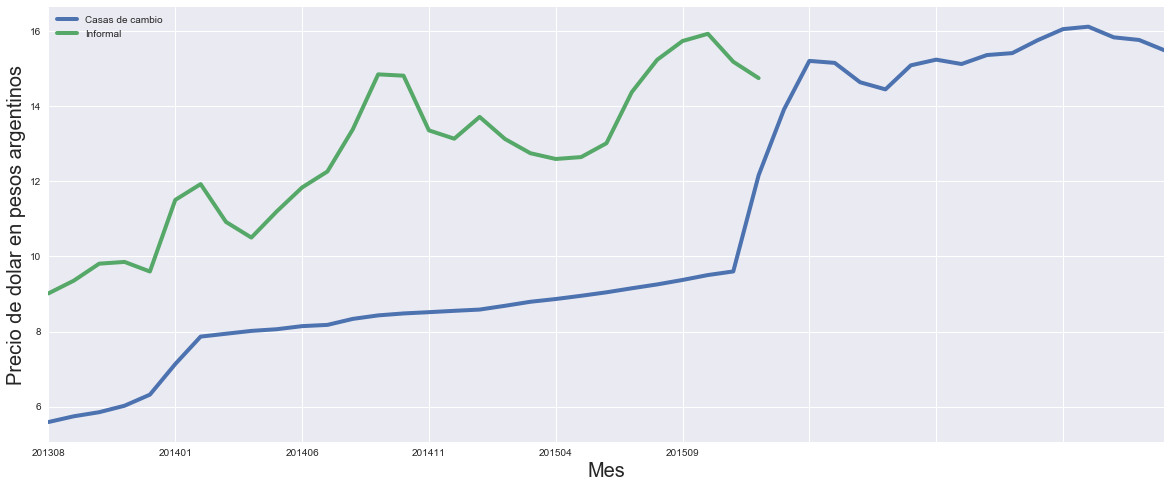

In [151]:
plt.figure()
precioDolar.loc[precioDolar.Tipo == 'Casas de cambio', :].groupby('Fecha').mean()\
                 .loc[:,'Venta'].plot(\
                 linewidth=4,figsize=(20,8),label='Casas de cambio');
precioDolar.loc[precioDolar.Tipo == 'Informal',:].groupby('Fecha').mean()\
                 .loc[:,'Venta'].plot(\
                 linewidth=4,figsize=(20,8),label='Informal');
plt.xlabel('Mes', fontsize=20);
plt.ylabel('Precio de dolar en pesos argentinos', fontsize=20);     
plt.legend();

Vemos que hubo grandes variaciones de valor de venta tanto en dólar oficial como informal. La del oficial fue muy marcada luego de la liberación del cepo, en diciembre de 2015. Por otro lado, hay dos curvas de aumento pronunciadas en el tipo de dólar: una a partir de mayo de 2015 (previo a elecciones) y otra a mediados de 2014, que coincide con la caída de ventas analizada anteriormente.
Algo también a analizar sería cuando fueron los momentos donde mayor diferencia de precio hubo entre ambos dólares y su porcentaje correspondiente.

In [152]:
dolarCasas = precioDolar.loc[precioDolar.Tipo == 'Casas de cambio', :]
dolarCasas = dolarCasas.groupby('Fecha').agg('mean')
dolarCasas.reset_index(inplace=True)
dolarCasas.head()

,Fecha,Venta
0,201308,5.588667
1,201309,5.741875
2,201310,5.850714
3,201311,6.022727
4,201312,6.318125


In [153]:
dolarInformal = precioDolar.loc[precioDolar.Tipo == 'Informal', :]
dolarInformal = dolarInformal.groupby('Fecha').agg('mean')
dolarInformal.reset_index(inplace=True)
dolarInformal.head()

,Fecha,Venta
0,201308,9.015333
1,201309,9.355000
2,201310,9.807143
3,201311,9.853636
4,201312,9.598750


In [154]:
ambosDolares = pd.merge(dolarCasas, dolarInformal, left_on = 'Fecha', right_on = 'Fecha', how='inner')
ambosDolares.columns = ['Fecha', 'Casas', 'Informal']
ambosDolares.head()

,Fecha,Casas,Informal
0,201308,5.588667,9.015333
1,201309,5.741875,9.355000
2,201310,5.850714,9.807143
3,201311,6.022727,9.853636
4,201312,6.318125,9.598750


In [155]:
ambosDolares['Diferencia'] = ambosDolares.Informal - ambosDolares.Casas
ambosDolares['PorcDif'] = ambosDolares.Diferencia * 100 / ambosDolares.Casas
ambosDolares.head()

,Fecha,Casas,Informal,Diferencia,PorcDif
0,201308,5.588667,9.015333,3.426667,61.314565
1,201309,5.741875,9.355000,3.613125,62.925874
2,201310,5.850714,9.807143,3.956429,67.623001
3,201311,6.022727,9.853636,3.830909,63.607547
4,201312,6.318125,9.598750,3.280625,51.924028


In [156]:
ambosDolares.sort_values('PorcDif', ascending = True).head()

,Fecha,Casas,Informal,Diferencia,PorcDif
28,201512,12.163333,14.75000,2.586667,21.266100
8,201404,8.016667,10.50200,2.485333,31.002079
7,201403,7.940313,10.91875,2.978438,37.510331
9,201405,8.061000,11.19850,3.137500,38.921970
21,201505,8.951250,12.64625,3.695000,41.279151


In [157]:
ambosDolares.sort_values('PorcDif', ascending = False).head()

,Fecha,Casas,Informal,Diferencia,PorcDif
13,201409,8.429500,14.850000,6.420500,76.167032
14,201410,8.481429,14.814762,6.333333,74.672955
25,201509,9.373500,15.737895,6.364395,67.897741
2,201310,5.850714,9.807143,3.956429,67.623001
26,201510,9.504091,15.930909,6.426818,67.621598


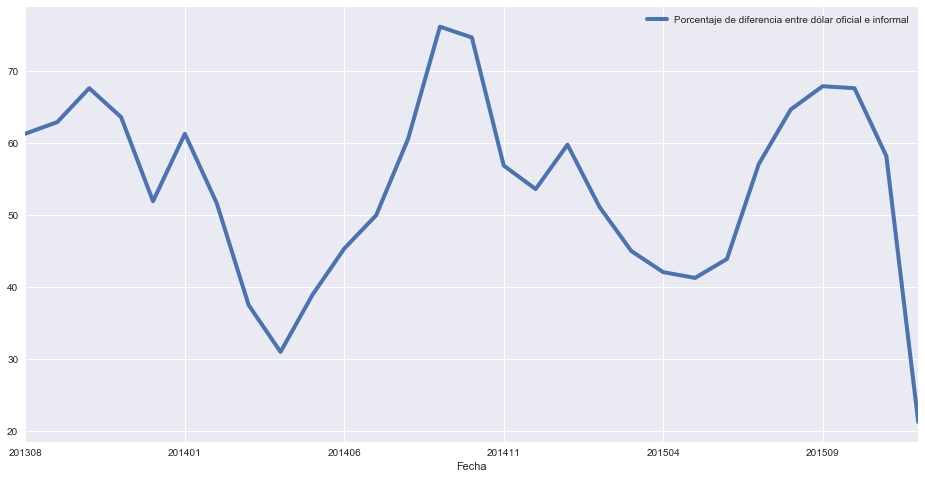

In [158]:
ambosDolares.plot.line(figsize=(16,8), x='Fecha', y='PorcDif', linewidth=4, \
                  label= 'Porcentaje de diferencia entre dólar oficial e informal');

Resulta interesante analizar el año 2014 en cuanto a ventas y diferencia entre tipos de dólar.
Recordemos que en ventas, a partir de mitad del 2014 las cantidades bajaron precipitosamente.
Si vamos al análisis de diferencia de tipos de dólar, vemos que uno de los meses con menor diferencia es abril de 2014, donde la diferencia era del 31%. Tan solo cinco meses después, en septiembre de 2014, la diferencia entre el dólar oficial y el informal trepó a un 76%. Con estos datos podemos afirmar que el cambio de diferencia de tipoos de dólar impactó muy fuertemente en las ventas inmobiliarias ya que la gente no podía acceder al dólar oficial debido al cepo.

# Capital Federal vs Conurbano

Existen varias preguntas que resultan interesantes comparando Capital federal con el conurbano bonaerense. Suponemos que se deberían vender más departamentos en capital federal por su alta densidad de población y menor espacio al conurbano. Mientras que, por el otro lado, la venta de casas debería ser más alta en el conurbano que en capital federal. Entonces:
- ¿Se venden más casas en el conurbano?
- ¿Se venden más departamentos en capital federal?

## ¿Se venden más casas en el conurbano?

In [159]:
def esCapital(x):
    if x['provincia'] == 'Capital Federal':
        return 'Si'
    return 'No'

datos['EsCapital'] = datos.apply(lambda row: esCapital(row),axis=1)

In [160]:
#Primero veremos cuantas ventas de casas hubo en cada uno de los distritos
casas = datos.loc[datos.tipo_propiedad.str.contains('house'), ['tipo_propiedad', 'EsCapital']].groupby('EsCapital').agg('count')
casas.reset_index(inplace = True)
casas

,EsCapital,tipo_propiedad
0,No,106365
1,Si,13566


In [161]:
totales = datos.loc[:, ['tipo_propiedad', 'EsCapital']].groupby('EsCapital').agg('count')
totales.reset_index(inplace = True)
totales

,EsCapital,tipo_propiedad
0,No,230263
1,Si,180560


In [162]:
#Ahora el porcentaje de ventas de casas sobre el total de ventas por lugar
totalCasas = pd.merge(totales, casas, left_on='EsCapital', right_on='EsCapital', how='inner')
totalCasas.columns = ['EsCapital', 'total', 'casas']
totalCasas['porcentaje'] = totalCasas.casas * 100 / totalCasas.total
totalCasas.set_index('EsCapital', inplace=True)
totalCasas

,total,casas,porcentaje
EsCapital,,,
No,230263,106365,46.192832
Si,180560,13566,7.513292


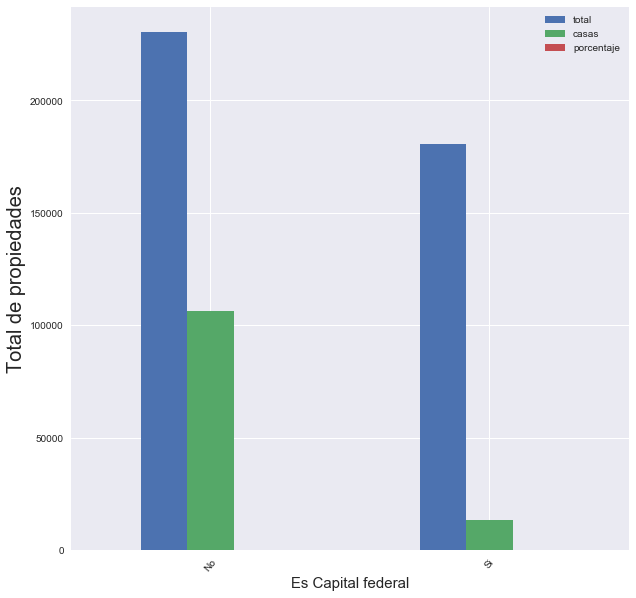

In [163]:
totalCasas.plot(kind="bar",rot=50, figsize=(10,10))
plt.xlabel('Es Capital federal', fontsize=15);
plt.ylabel('Total de propiedades', fontsize=20);

Los datos son concluyentes: no solamente hay más ventas de casas en el conurbano sino que casi la mitad de las ventas totales ahí corresponden a casas mientras que solo un 8% de las ventas en capital federal corresponden a casas.

# ¿Se venden más departamentos en capital federal?

In [164]:
departamentos = datos.loc[datos.tipo_propiedad.str.contains('apartment'), ['tipo_propiedad', 'EsCapital']].groupby('EsCapital').agg('count')
departamentos.reset_index(inplace = True)
departamentos

,EsCapital,tipo_propiedad
0,No,106056
1,Si,151987


In [165]:
totalDepartamentos = pd.merge(totales, departamentos, left_on='EsCapital', right_on='EsCapital', how='inner')
totalDepartamentos.columns = ['EsCapital', 'total', 'departamentos']
totalDepartamentos['porcentaje'] = totalDepartamentos.departamentos * 100 / totalDepartamentos.total
totalDepartamentos.set_index('EsCapital', inplace=True)
totalDepartamentos

,total,departamentos,porcentaje
EsCapital,,,
No,230263,106056,46.058637
Si,180560,151987,84.175343


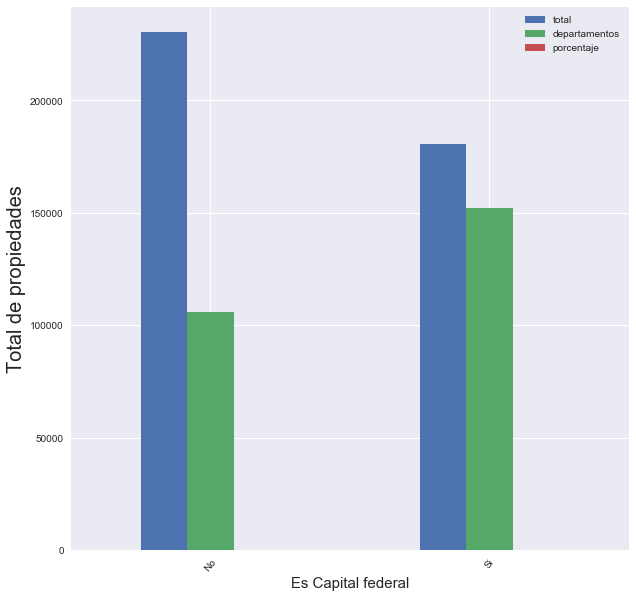

In [166]:
totalDepartamentos.plot(kind="bar",rot=50, figsize=(10,10))
plt.xlabel('Es Capital federal', fontsize=15);
plt.ylabel('Total de propiedades', fontsize=20);

Vemos que se vendieron casi cien mil departamentos más en capital federal que en el conurbano a pesar de tener cien mil ventas menos en ese distrito. El porcentaje de ventas de departamentos en capital federal es altísimo (83%) mientras que en el conurbano es más moderado (43%).

# Informe -- Graficos

# Capital Federal

In [ ]:

#Analizamos las propiedades por tipo
datos['tipo_propiedad'].value_counts().plot(kind='bar', rot=50, figsize=(10,8), color='blue' ,fontsize=13);
plt.title('Propiedades por tipo', fontsize=20);
plt.xlabel('Tipo de propiedades', fontsize=16);
plt.ylabel('Cantidad de propiedades', fontsize=20);

In [ ]:
tiposPropiedadCapital2.plot(kind='bar', rot=50, figsize=(10,8), color='red' ,fontsize=13);

plt.title('Cantidad de propiedades por tipo en Capital Federal', fontsize=20);
plt.xlabel('Cantidad de propiedades', fontsize=16);
plt.ylabel('Tipo de propiedades', fontsize=20);

In [ ]:
totalPropiedades2_top10.plot(kind='bar', rot=50, figsize=(10,8), color='green' ,fontsize=13);

plt.title('Barrios con mas propiedades para vender', fontsize=20);
plt.xlabel('Barrios', fontsize=16);
plt.ylabel('Cantidad de propiedades', fontsize=20);

In [ ]:
merge_tipo_prop_x_barrio_top10.plot(kind="bar", stacked=True , rot=50, figsize=(10,10))
plt.xlabel('Barrios Capital Federal', fontsize=15);
plt.ylabel('Total de propiedades', fontsize=20);

# Buenos Aires 

In [ ]:
datosBUE['tipo_propiedad'].value_counts().plot(kind='bar', rot=50, figsize=(10,8), color='blue' ,fontsize=13);
plt.title('Cantidad de propiedades en Buenos Aires', fontsize=20);
plt.xlabel('Tipo de propiedades', fontsize=16);
plt.ylabel('Cantidad de propiedades', fontsize=20);

In [ ]:
totalPropiedadesBUE_top5.plot(kind='bar', rot=50, figsize=(10,8), color='grey' ,fontsize=13);

plt.title('Cantidad de publicaciones en la provincia de Buenos Aires', fontsize=20);
plt.xlabel('Zona de Bs As', fontsize=16);
plt.ylabel('Cantidad de propiedades', fontsize=20);

In [ ]:
totalPropiedadesLocBUE_top20.plot(kind='bar', rot=90, figsize=(10,8), color='green' ,fontsize=13);

plt.title('TOP 20 - Localidades con mas propiedades para vender', fontsize=20);
plt.xlabel('Localidades BUE', fontsize=16);
plt.ylabel('Cantidad de propiedades', fontsize=20);

In [ ]:
merge_tipo_prop_x_barrio_top10.plot(kind="bar", stacked=True , rot=50, figsize=(10,10))
plt.xlabel('Localidades de Buenos Aires', fontsize=15);
plt.ylabel('Total de propiedades', fontsize=20);

# Precios promedio por barrio

In [ ]:
graficoDepartamento = promedioM2Apartment_top10[['localidad','precio_por_m2']].set_index('localidad')
graficoDepartamento.rename(columns={'precio_por_m2':'Precio por M2'},inplace=True)

graficoDepartamento.plot(kind="bar", stacked=True , rot=60, figsize=(15,10), color='green')

plt.xlabel('Localidades', fontsize=15);
plt.ylabel('Precio Promedio', fontsize=15);

In [ ]:
graficoHouse= promedioM2House_top10[['localidad','precio_por_m2']].set_index('localidad')
graficoHouse.rename(columns={'precio_por_m2':'Precio por M2'},inplace=True)
graficoHouse.plot(kind="bar", stacked=True , rot=60, figsize=(15,10), color='violet')

plt.xlabel('Localidades', fontsize=15);
plt.ylabel('Precio Promedio', fontsize=15);

In [ ]:
graficoPH = promedioM2PH_top10[['localidad','precio_por_m2']].set_index('localidad')
graficoPH.rename(columns={'precio_por_m2':'Precio por M2'},inplace=True)
graficoPH.plot(kind="bar", stacked=True , rot=60, figsize=(15,10), color='blue')

plt.xlabel('Localidades', fontsize=15);
plt.ylabel('Precio Promedio', fontsize=15);

In [ ]:
graficoStore = promedioM2Store_top10[['localidad','precio_por_m2']].set_index('localidad')
graficoStore.rename(columns={'precio_por_m2':'Precio por M2'},inplace=True)
graficoStore.plot(kind="bar", stacked=True , rot=60, figsize=(15,10), color='orange')

plt.xlabel('Localidades', fontsize=15);
plt.ylabel('Precio Promedio', fontsize=15);

# Precios en Relacion a Superficies Cubiertas / Descubiertas

In [ ]:
promedioStoreFiltered = promedioStore[['localidad', 'precio']].rename(columns={'precio':'precio_balcon'})
promedioStoreSinBalconFiltered = promedioStoreSinBalcon[['localidad', 'precio']].rename(columns={'precio':'precio_sin_balcon'})

preciosStore = pd.merge(promedioStoreFiltered,promedioStoreSinBalconFiltered, on='localidad').set_index('localidad')
preciosStore.sort_values((['precio_balcon'] + ['precio_sin_balcon']), ascending = False).head(10).plot(kind="bar", stacked=True , rot=60, figsize=(25,10))

plt.xlabel('Localidades', fontsize=15);
plt.ylabel('Precio', fontsize=20);

In [ ]:
promedioApartmentFiltered = promedioApartment[['localidad', 'precio']].rename(columns={'precio':'precio_balcon'})
promedioApartmentSinBalconFiltered = promedioApartmentSinBalcon[['localidad', 'precio']].rename(columns={'precio':'precio_sin_balcon'})

preciosApartment = pd.merge(promedioApartmentFiltered,promedioApartmentSinBalconFiltered, on='localidad').set_index('localidad')
preciosApartment.sort_values((['precio_balcon'] + ['precio_sin_balcon']), ascending = False).head(10).plot(kind="bar", stacked=True , rot=60, figsize=(25,10))

plt.xlabel('Localidades', fontsize=15);
plt.ylabel('Precio', fontsize=20);


In [ ]:
promedioHouseFiltered = promedioHouse[['localidad', 'precio']].rename(columns={'precio':'precio_balcon'})
promedioHouseSinBalconFiltered = promedioHouseSinBalcon[['localidad', 'precio']].rename(columns={'precio':'precio_sin_balcon'})

preciosHouse = pd.merge(promedioHouseFiltered,promedioHouseSinBalconFiltered, on='localidad').set_index('localidad')
preciosHouse.sort_values((['precio_balcon'] + ['precio_sin_balcon']), ascending = False).head(10).plot(kind="bar", stacked=True , rot=60, figsize=(25,10))

plt.xlabel('Localidades', fontsize=15);
plt.ylabel('Precio', fontsize=20);


# Precio Por Habitaciones

In [ ]:
precioHabitaciones.plot(kind='area', rot=60, figsize=(20,10), color='green')

plt.xlabel('Habitaciones en Capital Federal', fontsize=20);
plt.ylabel('Precio ($)', fontsize=20);

In [ ]:
precioHabitacionesBUE.plot(kind='area', rot=60, figsize=(25,10), color='orange')

plt.xlabel('Habitaciones en Buenos Aires', fontsize=20);
plt.ylabel('Precio ($)', fontsize=20);

# Varaciación de Precios a lo largo del tiempo

In [ ]:
graficoApartment.plot(kind="bar", stacked=True , rot=50, figsize=(20,10), color='green')

plt.xlabel('Mes - Año', fontsize=20);
plt.ylabel('Precio Promedio ($) Departamentos', fontsize=20);

In [ ]:
graficoStoreAnio.plot(kind="bar", stacked=True , rot=50, figsize=(20,10), color='purple')

plt.xlabel('Mes - Año', fontsize=20);
plt.ylabel('Precio Promedio ($) Locales', fontsize=20);

In [ ]:
graficoPHAnio.plot(kind="bar", stacked=True , rot=50, figsize=(20,10), color='orange')

plt.xlabel('Mes - Año', fontsize=20);
plt.ylabel('Precio Promedio ($) PH', fontsize=20);

In [ ]:
graficoStoreAnio.plot(kind="bar", stacked=True , rot=50, figsize=(20,10), color='red')


plt.xlabel('Mes - Año', fontsize=20);
plt.ylabel('Precio Promedio ($) Casas', fontsize=20);

# Cantidades Por Fecha

In [ ]:

graficoCantidadApartment.plot(kind="bar", stacked=True , rot=50, figsize=(20,10), color='green')

plt.xlabel('Mes - Año', fontsize=20);
plt.ylabel('Total de propiedades Departamentos', fontsize=20);

In [ ]:
graficoCantidadHouse.plot(kind="bar", stacked=True , rot=50, figsize=(20,10), color='red')

plt.xlabel('Mes - Año', fontsize=20);
plt.ylabel('Total de propiedades Casas', fontsize=20);

In [ ]:
graficoCantidadPH.plot(kind="bar", stacked=True , rot=50, figsize=(20,10))

plt.xlabel('Mes - Año', fontsize=20);
plt.ylabel('Total de propiedades PHs', fontsize=20);

In [ ]:

graficoCantidadStore.plot(kind="bar", stacked=True , rot=50, figsize=(15,10), color='purple')

plt.xlabel('Mes - Año', fontsize=15);
plt.ylabel('Total de propiedades Locales', fontsize=20);

In [ ]:
plt.figure()
precioDolar.loc[precioDolar.Tipo == 'Casas de cambio', :].groupby('Fecha').mean()\
                 .loc[:,'Venta'].plot(\
                 linewidth=4,figsize=(20,8),label='Casas de cambio');
precioDolar.loc[precioDolar.Tipo == 'Informal',:].groupby('Fecha').mean()\
                 .loc[:,'Venta'].plot(\
                 linewidth=4,figsize=(20,8),label='Informal');
plt.xlabel('Fecha', fontsize=20);
plt.ylabel('Precio de dolar en pesos argentinos', fontsize=20);    
plt.legend();

In [ ]:
ambosDolares.plot(figsize=(16,8), x='Fecha', y='PorcDif', linewidth=4, \
                  label= 'Porcentaje de diferencia entre dólar oficial e informal');
plt.xlabel('Fecha', fontsize=20);
plt.ylabel('Porcentaje', fontsize=20);  